# Predicting the success of Marketing Campaigns using Machine Learning.
*Supervised Learning: Classification (part of IBM Machine Learning Profession Certificate) - Course Project.*

> *Business has only two functions - marketing and innovation.*  
**Milan Kundera**

<img src="https://www.assystem.com/wp-content/uploads/2019/01/data-sciences.jpg" />

## Table of contents
1. [Introduction](#introduction)  
  1.1. [Scope of the project](#scope)  
  1.2. [Data Understanding](#understanding)  
2. [Data Exploration](#exploration)  
  2.1. [Data Cleaning](#cleaning)  
  2.2. [EDA - Exploratory Data Analysis](#eda)  
  2.3. [Feature Engineering and Variable Transformations](#featureengineering)  
3. [Model Development](#modeldevelopment)  
  3.1. [Classifier - 1. K-Nearest Neighbors (KNN)](#knn)  
  3.2. [Classifier - 2. Random Forest](#randomforest)  
  3.3. [Classifier - 3. Support Vector Machines](#svm)  
  3.4. [Classifier - 4. Ensemble Models: Stacking Classifier](#stacking)
5. [Results](#results)
4. [Discussion](#discussion)
5. [Conclusion](#conclusion)

## 1. Introduction <a name=introduction></a>

### 1.1. Scope of the project <a name="scope"></a>

When it comes to marketing, historical data should always drive strategy and planning. **Predictive analytics is the next level of using that data for marketing success.**  
**Predictive analytics is the use of data, statistical algorithms and AI techniques to identify possible future outcomes.** This can help companies stay ahead of the curve and assess the future of their marketing efforts.  

Scope of this project is building a predictive Model, using historical data and AI algorithms, able to forecast whether a customer will respond positively, or negatively, to a given Marketing Campaign. Predictive information such as this is, of course, very valuable for organizations, since it can **help companies make more sound decisions when it comes to strategic planning, marketing spending, customer and target market segmentation, ROI prediction, and understand the main drivers/reasons that lead to the success (or unsuccess) of a marketing campaign.**  

To develop such a predictive model, I'll use an analytic, **predictive, machine-learning driven approach,** to build a Classifier algorithm able to use the available historical data to predict what the customer's response to a given campaign would be.  
Main focus of the Classification Model is on **Prediction**.

**Target market** of the project are markerting-savy companies, willing to leverage the power of Artificial Intelligence to better anticipate marketing campaign's return, manage budget in a more efficient way, fine-tune their marketing efforts, as well as understand main customer drivers.  

Source of data: <a href='https://www.kaggle.com/pankajbhowmik/bank-marketing-campaign-subscriptions'>Kaggle.com</a>.

### 1.2. Data Understanding <a name="understanding"></a>

In [1]:
# Import the needed libraries
import pandas as pd
print('Libraries successfully imported.')

Libraries successfully imported.


The dataset contains information about tele-marketing campaigns from a Portuguese banking institution. Purpose of these campaigns was to prompt their clients to subscribe for a specific financial product (Term Deposit). After each call, clients were asked their intentions of either subscribing to the product (indicating a successful campaign) or not (unsuccessful campaign).

The dataset has 41,188 rows (instances of calls to clients) and 21 columns (variables). In some cases, same client was contacted multiple times, although each call was considered independent from another even if the client was the same.

In [2]:
# Import the data set and start the analysis
data = pd.read_csv(r'./archive\Bank_Campaign.csv', sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [3]:
data.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
41183       4963.6         yes  
41184       4963.6          no  
41185       4963.6          no  
41186       4963.6         yes  
41187       4963.6          no  

[5 rows x 21 columns]

In [4]:
print('Number of rows: ' + str(data.shape[0]) + '. Number of columns: ' + str(data.shape[1])) 

Number of rows: 41188. Number of columns: 21


In [5]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

In [6]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

The dataset contains **41,188 observations with 21 attributes: 11 object-types (including the Target Variable) and 10 numeric-types, 5 floats and 5 integers.**

In [7]:
data.describe(include='all').T

count unique                top   freq       mean       std  \
age             41188    NaN                NaN    NaN    40.0241   10.4212   
job             41188     12             admin.  10422        NaN       NaN   
marital         41188      4            married  24928        NaN       NaN   
education       41188      8  university.degree  12168        NaN       NaN   
default         41188      3                 no  32588        NaN       NaN   
housing         41188      3                yes  21576        NaN       NaN   
loan            41188      3                 no  33950        NaN       NaN   
contact         41188      2           cellular  26144        NaN       NaN   
month           41188     10                may  13769        NaN       NaN   
day_of_week     41188      5                thu   8623        NaN       NaN   
duration        41188    NaN                NaN    NaN    258.285   259.279   
campaign        41188    NaN                NaN    NaN    2.56759   2.77001   
pdays           41188    NaN                NaN    NaN    962.475   186.911   
previous        41188    NaN                NaN    NaN   0.172963  0.494901   
poutcome        41188      3        nonexistent  35563        NaN       NaN   
emp.var.rate    41188    NaN                NaN    NaN  0.0818855   1.57096   
cons.price.idx  41188    NaN                NaN    NaN    93.5757   0.57884   
cons.conf.idx   41188    NaN                NaN    NaN   -40.5026    4.6282   
euribor3m       41188    NaN                NaN    NaN    3.62129   1.73445   
nr.employed     41188    NaN                NaN    NaN    5167.04   72.2515   
subscribed      41188      2                 no  36548        NaN       NaN   

                   min     25%     50%     75%     max  
age                 17      32      38      47      98  
job                NaN     NaN     NaN     NaN     NaN  
marital            NaN     NaN     NaN     NaN     NaN  
education          NaN     NaN     NaN     NaN     NaN  
default            NaN     NaN     NaN     NaN     NaN  
housing            NaN     NaN     NaN     NaN     NaN  
loan               NaN     NaN     NaN     NaN     NaN  
contact            NaN     NaN     NaN     NaN     NaN  
month              NaN     NaN     NaN     NaN     NaN  
day_of_week        NaN     NaN     NaN     NaN     NaN  
duration             0     102     180     319    4918  
campaign             1       1       2       3      56  
pdays                0     999     999     999     999  
previous             0       0       0       0       7  
poutcome           NaN     NaN     NaN     NaN     NaN  
emp.var.rate      -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx    -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m        0.634   1.344   4.857   4.961   5.045  
nr.employed     4963.6  5099.1    5191  5228.1  5228.1  
subscribed         NaN     NaN     NaN     NaN     NaN

Predictor variables can be divided into following groups:

**1. Customer-related variables:**  
a. age: client's age (range: 17 - 98)  
b. job: client's type of job (12 categories)  
c. marital: marital status (4 categories: 'married', 'single', 'divorced', 'unknown')  
d. education: level of education (8 categories: 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown')  
e. default: if the client has credit in default (3 categories: 'no', 'unknown', 'yes')  
f. housing: if the client has a mortgage on his/her house (3 categories: 'no', 'unknown', 'yes')  
g. loan: if the client has a personal loan (3 categories: 'no', 'unknown', 'yes')  

**2. Variables related to last contact (current campaign):**  
a. contact: type of communication (2 categories: 'telephone', 'cellular')  
b. month: month of last contact (10 categories)  
c. day_of_week: day of last contact (5 categories)  
d. duration: call duration, in seconds (range: 0 - 4,918 (more than 1 hour and 20 minutes))  
e. campaign: number of contacts performed during this campaign and for this client (range: 1 - 56)

**3. Other marketing-related variables:**  
a. pdays: number of days from last contact (range: 0 - 999)  
b. previous: number of contacts performed before this campaign and for this client (range: 0 - 7)  
c. poutcome: outcome of previous marketing campaign (3 categories: 'nonexistent', 'failure', 'success')  

**4. Socioeconomic variables:**  
a. emp.var.rate: employement variation rate - quarterly indicator (range: (-3.4) - 1.4)  
b. cons.price.idx: consumer price index - monthly indicator (range: 92.201	- 94.767)  
c. cons.conf.idx: consumer confidence index - monthly indicator (range: (-50.8) - (-26.9))  
d. euribor3m: euribor 3 month rate - daily indicator (range: 0.634 - 5.045)  
e. nr.employed: number of employees - quarterly indicator (range: 4963.6 - 5228.1)

**5. Target variable:**  
a. subscribed: whether the customer signed up to the product (2 categories: 'yes', 'no').

Let's draw some first consideration about the dataset, based on the descriptive stats:
* Several categorical variables seem to have quite an imbalanced distribution: job, marital, education, default, loan, month, poutcome.
* Some numeric-type variable seem to have quite a skewed (either right or left) distribution: duration, campaign, pdays, previous... .
* Will perform outlier and distribution analysis to check for mistakes and anomalies, to verify data veracity.

In [8]:
data.subscribed.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: subscribed, dtype: float64

**Target Variable is greatly imbalanced with almost 89% of customers not subscribing** to the advertised product.

## 2. Data Exploration <a name="exploration"></a>

In [9]:
# import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
from scipy.stats.mstats import normaltest
print('Libraries successfully imported.')
%matplotlib inline

Libraries successfully imported.


In [10]:
# create a copy of the dataset
data_copy = data.copy()

### 2.1. Data Cleaning <a name=cleaning></a> 

#### 2.1.1. Duplicates

In [11]:
print('Number of duplicates in the dataset: ', sum(data.duplicated()))

Number of duplicates in the dataset:  12


In [359]:
data.drop(data[data.duplicated() == True].index, axis=0, inplace=True)
data.reset_index(inplace=True, drop=True)
print('Number of rows, after removing duplicates: ' + str(data.shape[0]) + '.')

Number of rows, after removing duplicates: 41176.


#### 2.1.2. Missing Values

In [13]:
for column in data.columns:
    print(column.capitalize() + ' - Missing Values: ' + str(sum(data[column].isnull())))

Age - Missing Values: 0
Job - Missing Values: 0
Marital - Missing Values: 0
Education - Missing Values: 0
Default - Missing Values: 0
Housing - Missing Values: 0
Loan - Missing Values: 0
Contact - Missing Values: 0
Month - Missing Values: 0
Day_of_week - Missing Values: 0
Duration - Missing Values: 0
Campaign - Missing Values: 0
Pdays - Missing Values: 0
Previous - Missing Values: 0
Poutcome - Missing Values: 0
Emp.var.rate - Missing Values: 0
Cons.price.idx - Missing Values: 0
Cons.conf.idx - Missing Values: 0
Euribor3m - Missing Values: 0
Nr.employed - Missing Values: 0
Subscribed - Missing Values: 0


Dataset has no missing values.

#### 2.1.3. Outlier and Distribution Analysis

In [14]:
data.select_dtypes('number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [15]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


age - Data is not normally distributed.


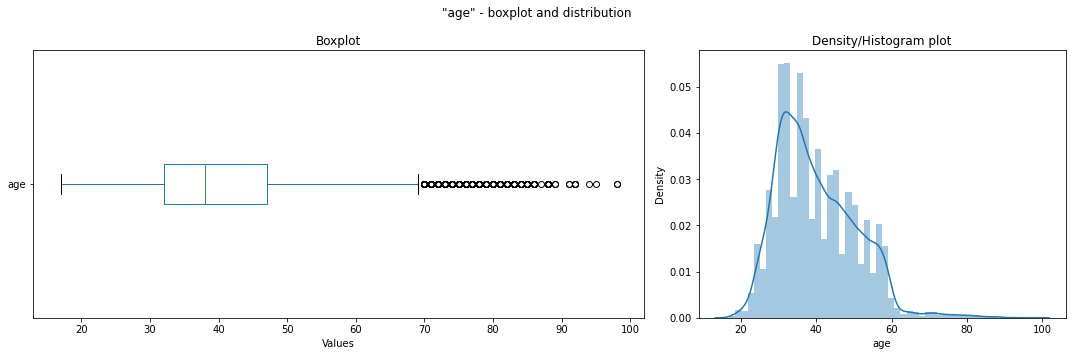

In [16]:
# visualize boxplot and distribution of numeric-type variables
def box_dist_plot(attribute, fig_size=(15,5), fig_ratio=[2.5,1.5], box_vert=False):
    plt.figure(figsize=fig_size) 
    gs = gridspec.GridSpec(1, 2, width_ratios=fig_ratio)
    ax1 = plt.subplot(gs[0])
    data[attribute].plot(kind='box', vert=box_vert, ax=ax1)
    ax1.set(title='Boxplot', xlabel='Values')
    ax2 = plt.subplot(gs[1])
    sns.distplot(data[attribute], ax=ax2)
    ax2.set(title='Density/Histogram plot')
    plt.suptitle('"{}" - boxplot and distribution'.format(attribute))    
    plt.tight_layout()
    
# let's define a function for normal test distribution
def norm_test(attribute):
    test_st, p_value = normaltest(data[attribute].values)
    if p_value <= 0.05:
        print('{} - Data is not normally distributed.'.format(attribute))
    else:
        print('{} - Data is normally distributed.'.format(attribute))
    
box_dist_plot('age')
norm_test('age')

In [360]:
def outlier_detector(attribute):
    q25, q50, q75 = np.percentile(data[attribute], [25,50,75])
    iqr = q75 - q25
    min_lim = round(q25 - 1.5*iqr, 1)
    max_lim = round(q75 + 1.5*iqr, 1)
    if data[attribute].min() > min_lim and data[attribute].max() < max_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(data[attribute].min()) + ' - ' + str(data[attribute].max()) + '.')
    elif data[attribute].min() > min_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(data[attribute].min()) + ' - ' + str(max_lim) + '.')
    elif data[attribute].max() < max_lim:
        print(str(attribute) + ' attribute - no outlier region: ' + str(min_lim) + ' - ' + str(data[attribute].max()) + '.')
    else:
        print(str(attribute) + ' attribute - no outlier region: ' + str(min_lim) + ' - ' + str(max_lim) + '.')
    global outlier_list
    outlier_list = []
    for x in data[attribute]:
        if x < min_lim or x > max_lim:
            outlier_list.append(x)
    print('Number of outliers: ' + str(len(outlier_list)))
    print('Percentage of outliers: ' + str(round(len(outlier_list)/data.shape[0]*100,2)) + '%.')
    print('First ten outliers:', outlier_list[0:10])

outlier_detector('age')

age attribute - no outlier region: 17 - 69.5.
Number of outliers: 468
Percentage of outliers: 1.14%.
First ten outliers: [70, 76, 73, 88, 88, 88, 88, 88, 88, 88]


**age** attribute has few outliers (1% of data) which seem to be correct observations: no customers is older than 100 years, which is not impossible. The variable is not normally distributed.

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


duration - Data is not normally distributed.


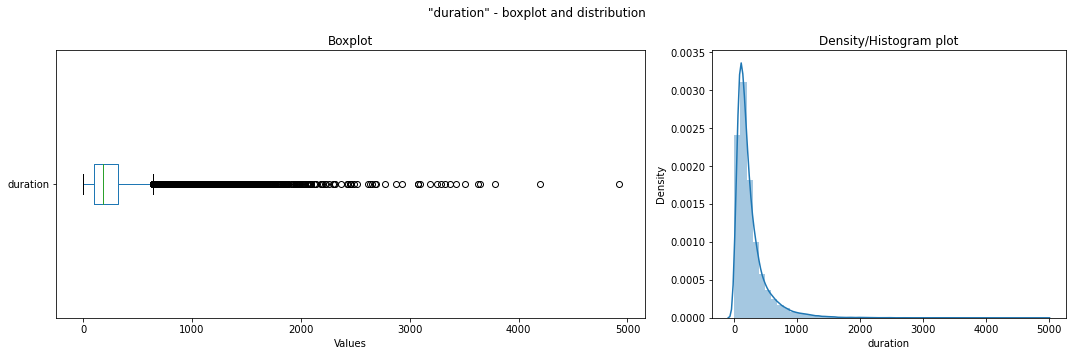

In [18]:
box_dist_plot('duration')
norm_test('duration')

**duration** variable is not normally distributed, and has quite a few outliers. Let's look into those.

In [19]:
outlier_detector('duration')

duration attribute - no outlier region: 0 - 644.5.
Number of outliers:2963
Percentage of outliers: 7.2%.
First ten outliers: [1666, 787, 812, 1575, 1042, 1467, 849, 677, 2033, 843]


In [20]:
# store the outliers
duration_outliers = outlier_list

In [21]:
# Let's have a look at the 2 most extreme outliers
data[data.duration > 4000]

age          job  marital            education default housing loan  \
22185   52  blue-collar  married             basic.4y      no      no   no   
24084   33   technician   single  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
22185  telephone   aug         thu  ...         3    999         0   
24084  telephone   nov         mon  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
22185  nonexistent          1.4          93.444          -36.1      4.963   
24084  nonexistent         -0.1          93.200          -42.0      4.406   

       nr.employed  subscribed  
22185       5228.1         yes  
24084       5195.8          no  

[2 rows x 21 columns]

Outliers account for more than 7% of data, and they are all beyond the max limit (Interquantile Range method). The Max limit is 645 secs (about 10 minutes of call). 2 outliers are beyond 4,000 seconds (more than 1-hour call). Although this seems to be quite a long duration for a marketing call, these observations may be part of the natural variability of the data. I keep those records in the dataset.

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


campaign - Data is not normally distributed.


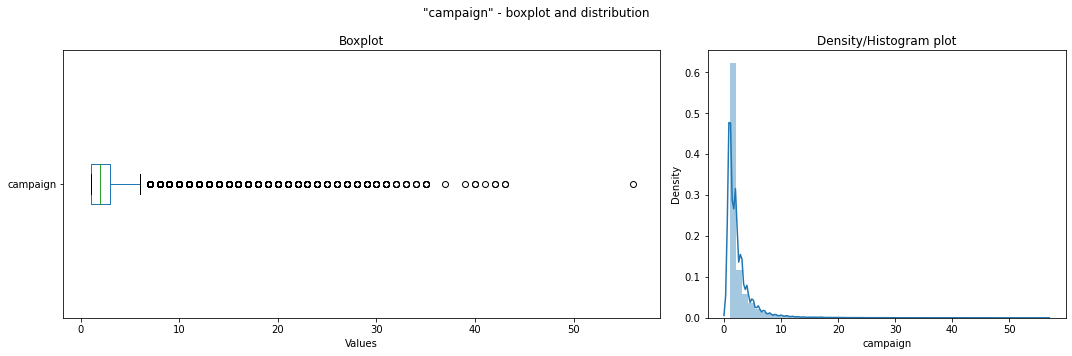

In [22]:
box_dist_plot('campaign')
norm_test('campaign')

In [23]:
# Let's look at campaign outliers
outlier_detector('campaign')

campaign attribute - no outlier region: 1 - 6.0.
Number of outliers:2406
Percentage of outliers: 5.84%.
First ten outliers: [7, 8, 8, 7, 7, 7, 7, 9, 9, 7]


In [24]:
# Let's look at the most extreme outliers
data[data.campaign >= 40].T

4106                 4167         5303   \
age                            32                   29           44   
job                        admin.           technician      retired   
marital                   married              married      married   
education       university.degree  professional.course     basic.9y   
default                   unknown                   no           no   
housing                   unknown                  yes          yes   
loan                      unknown                   no           no   
contact                 telephone            telephone    telephone   
month                         may                  may          may   
day_of_week                   mon                  mon          fri   
duration                      261                  124          147   
campaign                       56                   42           42   
pdays                         999                  999          999   
previous                        0                    0            0   
poutcome              nonexistent          nonexistent  nonexistent   
emp.var.rate                  1.1                  1.1          1.1   
cons.price.idx             93.994               93.994       93.994   
cons.conf.idx               -36.4                -36.4        -36.4   
euribor3m                   4.858                4.858        4.857   
nr.employed                  5191                 5191         5191   
subscribed                     no                   no           no   

                      11032                11768              13445  \
age                      38                   56                 32   
job             blue-collar        self-employed         technician   
marital             married              married             single   
education          basic.4y  professional.course  university.degree   
default                  no                   no                 no   
housing                 yes                   no                yes   
loan                     no                  yes                yes   
contact           telephone            telephone          telephone   
month                   jun                  jun                jul   
day_of_week             wed                  fri                wed   
duration                 25                   13                 16   
campaign                 41                   40                 43   
pdays                   999                  999                999   
previous                  0                    0                  0   
poutcome        nonexistent          nonexistent        nonexistent   
emp.var.rate            1.4                  1.4                1.4   
cons.price.idx       94.465               94.465             93.918   
cons.conf.idx         -41.8                -41.8              -42.7   
euribor3m             4.962                4.959              4.962   
nr.employed          5228.1               5228.1             5228.1   
subscribed               no                   no                 no   

                            18723              18749  
age                            54                 36  
job                        admin.             admin.  
marital                   married             single  
education       university.degree  university.degree  
default                   unknown                 no  
housing                       yes                 no  
loan                           no                 no  
contact                  cellular           cellular  
month                         jul                jul  
day_of_week                   thu                thu  
duration                       65                 18  
campaign                       43                 40  
pdays                         999                999  
previous                        0                  0  
poutcome              nonexistent        nonexistent  
emp.var.rate          

The variable is not normally distributed. **campaign** outliers account for almost 6% of data, and, again, they are all beyond the max limit (Interquantile Range method). Max limit is 6 contacts: almost 95% of customers have been contacted from 1 to 6 times. 1 customer has been contacted 56 times. Again, this seems to be quite a big number, but the observation may be part of the natural variability of the data. I keep those outliers in the dataset.

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pdays - Data is not normally distributed.


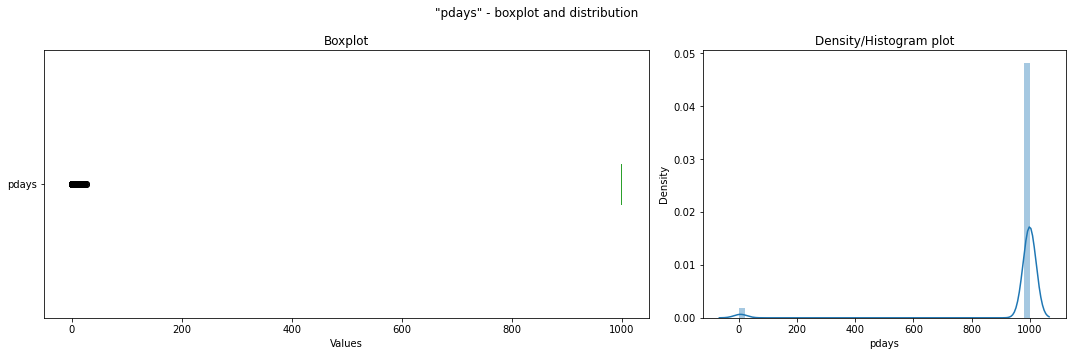

In [25]:
box_dist_plot('pdays')
norm_test('pdays')

In [26]:
outlier_detector('pdays')

pdays attribute - no outlier region: 999.0 - 999.0.
Number of outliers:1515
Percentage of outliers: 3.68%.
First ten outliers: [6, 4, 4, 3, 4, 5, 5, 1, 6, 4]


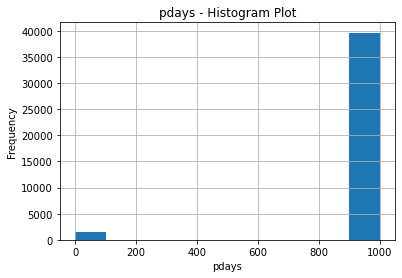

In [27]:
data.pdays.hist()
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('pdays - Histogram Plot')
plt.show()

In [28]:
# examine the pdays outliers
pdays_outliers = outlier_list
print('pdays outlier range: ' + str(min(pdays_outliers)) + ' - ' + str(max(pdays_outliers)))

pdays outlier range: 0 - 27


The attribute data distribution looks odd: 96% of data have the same value, which is 999, that is to say last contact had happened 999 days before the new campaign; 1,515 observations (3.7% of data) had been contacted from 0 to 27 days before the new campaign. The attribute seems to be either wrongly recorded or, anyway, not relevant. I drop the column.

In [29]:
data.drop(['pdays'], axis=1, inplace=True)
data.shape

(41176, 20)

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


previous - Data is not normally distributed.


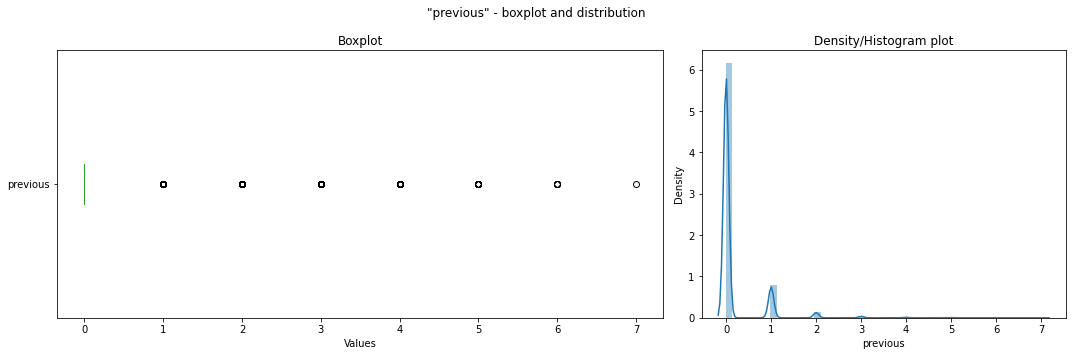

In [30]:
box_dist_plot('previous')
norm_test('previous')

In [31]:
outlier_detector('previous')

previous attribute - no outlier region: 0.0 - 0.0.
Number of outliers:5625
Percentage of outliers: 13.66%.
First ten outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


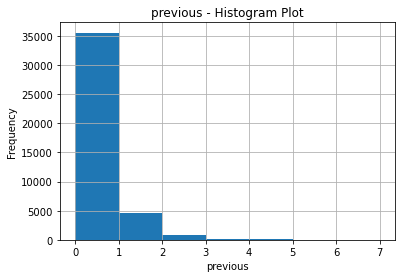

In [32]:
data.previous.hist(bins=7)
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.title('previous - Histogram Plot')
plt.show()

In [33]:
data.previous.value_counts(normalize=True)

0    0.863391
1    0.110768
2    0.018312
3    0.005246
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

In [34]:
data.previous.value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

**"previous"** distribution looks quite imbalanced: 86% of customers had never been contacted prior to this campaign (**previous** value = 0), 11% had been contaced once, 1.8% twice, the remaining 1.2% from 3 to 7 times.  
Let's have a look at the attribute **"poutcome"**

In [35]:
data.poutcome.value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [36]:
if data[data.previous == 0].index.all() == data[data.poutcome == 'nonexistent'].index.all():
    print('All customers who had never been contacted prior to this campaign have "nonexistent" as poutcome value.')
if data[data.previous != 0].index.all() == data[data.poutcome != 'nonexistent'].index.all():
    print('All customers with a "poutcome" different that "nonexistent" had been contacted prior to this campaign.')
    print('Attributes seem to be correctly recorded.')

All customers who had never been contacted prior to this campaign have "nonexistent" as poutcome value.
All customers with a "poutcome" different that "nonexistent" had been contacted prior to this campaign.
Attributes seem to be correctly recorded.


##### Socioeconomic Variables

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


emp.var.rate - Data is not normally distributed.


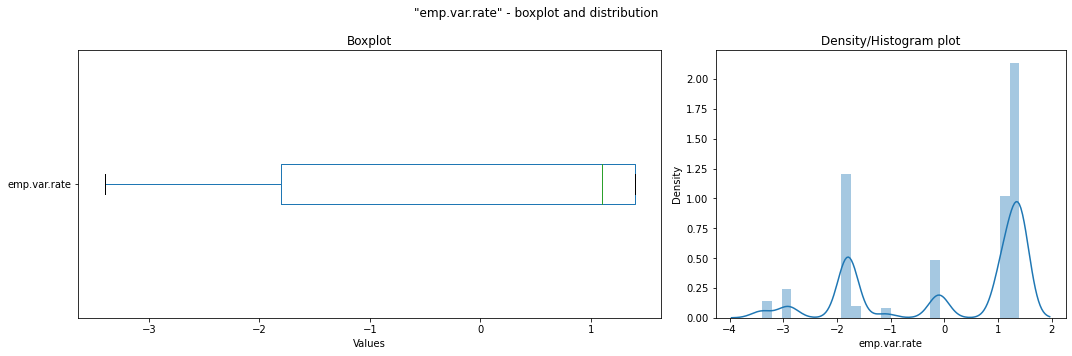

In [37]:
box_dist_plot('emp.var.rate')
norm_test('emp.var.rate')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


cons.price.idx - Data is not normally distributed.


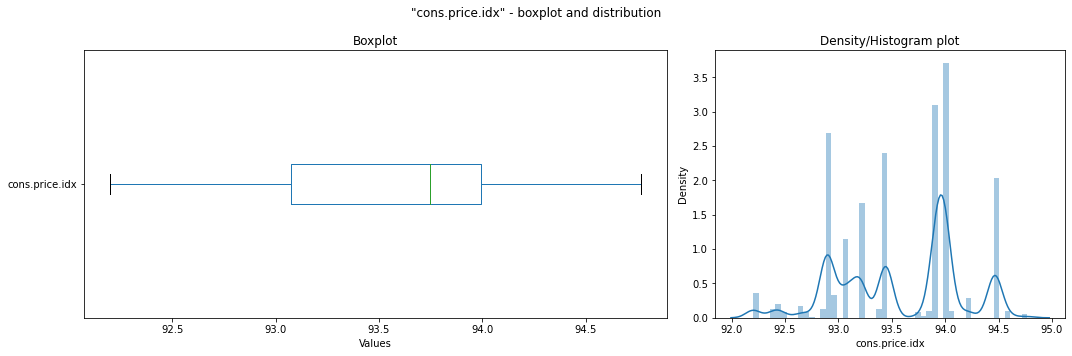

In [38]:
box_dist_plot('cons.price.idx')
norm_test('cons.price.idx')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


cons.conf.idx - Data is not normally distributed.


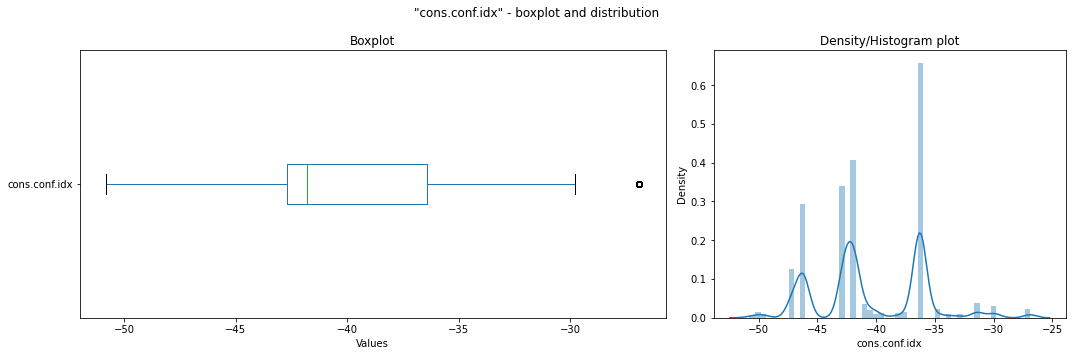

In [39]:
box_dist_plot('cons.conf.idx')
norm_test('cons.conf.idx')

In [40]:
outlier_detector('cons.conf.idx')

cons.conf.idx attribute - no outlier region: -50.8 - -26.9.
Number of outliers:0
Percentage of outliers: 0.0%.
First ten outliers: []


In [41]:
data['cons.conf.idx'].max()

-26.9

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


euribor3m - Data is not normally distributed.


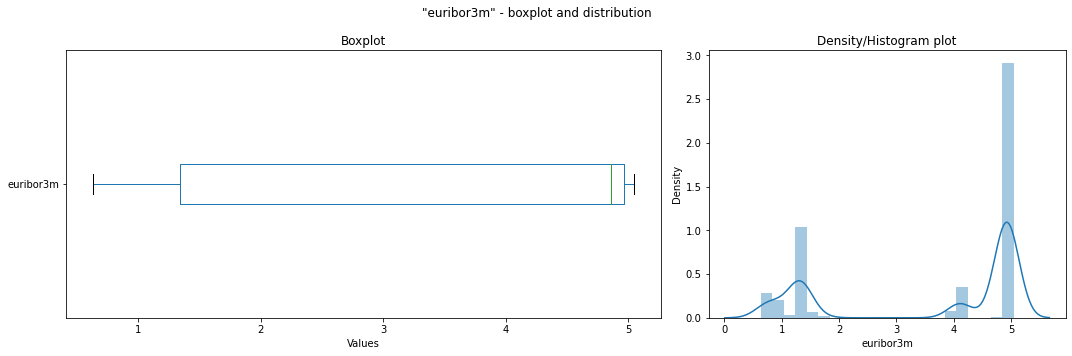

In [42]:
box_dist_plot('euribor3m')
norm_test('euribor3m')

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


nr.employed - Data is not normally distributed.


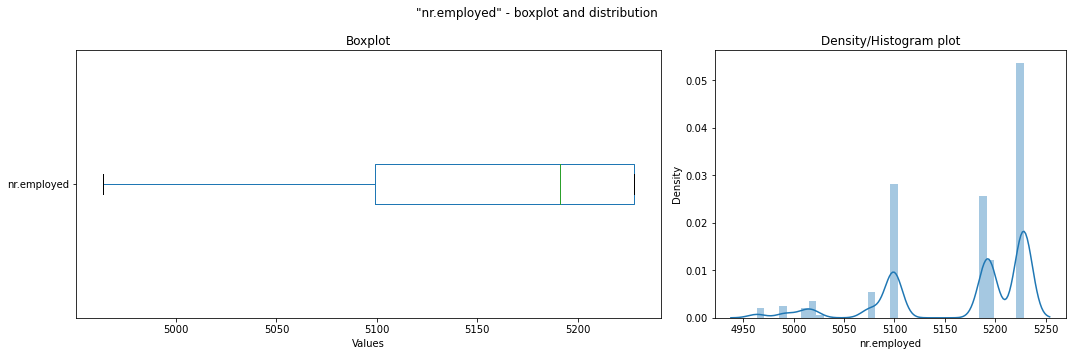

In [43]:
box_dist_plot('nr.employed')
norm_test('nr.employed')

All socioeconomic variables are not normally distributed, and have no outliers.

#### 2.1.4. Frequency Distribution Analysis for Categorical Variables

In [44]:
data.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')

In [45]:
data.describe(include='object')

job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome subscribed  
count   41176       41176        41176      41176  
unique     10           5            3          2  
top       may         thu  nonexistent         no  
freq    13767        8618        35551      36537

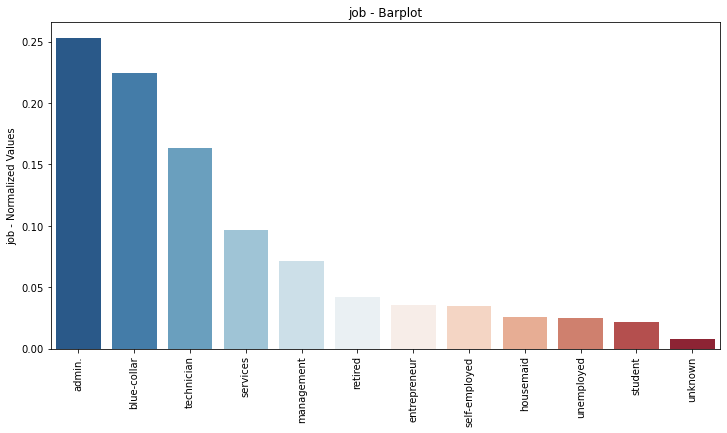

job - Value Counts
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [46]:
def bargraph(attribute, figsize=(12,6), normalize_plot=True, palette='RdBu_r', rotation=90, data=data, normalize_count=False):
    fig = plt.figure(figsize=figsize)
    sns.barplot(y=data[attribute].value_counts(normalize=normalize_plot),
                x=data[attribute].value_counts().index,
                data=data, palette=palette)
    plt.xticks(rotation=rotation)
    if normalize_plot == True:
        plt.ylabel(attribute + " - Normalized Values")
    else: plt.ylabel(attribute)
    plt.title(attribute + ' - Barplot')
    plt.show()
    print('{} - Value Counts'.format(attribute))
    print(data[attribute].value_counts(normalize=normalize_count))

bargraph('job')

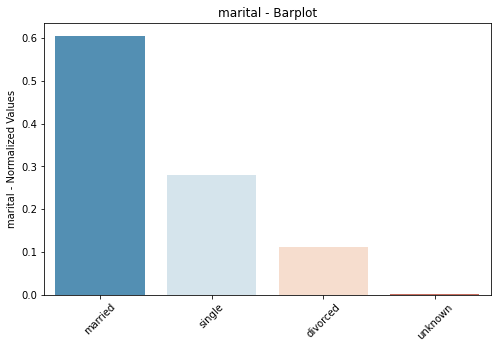

marital - Value Counts
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


In [47]:
bargraph('marital', figsize=(8,5), rotation=45)

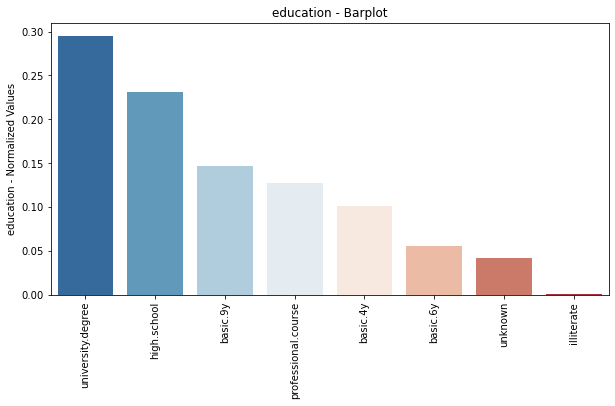

education - Value Counts
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


In [48]:
bargraph('education', figsize=(10,5))

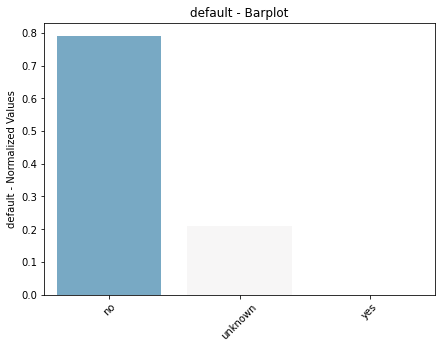

default - Value Counts
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


In [49]:
bargraph('default', figsize=(7,5), rotation=45)

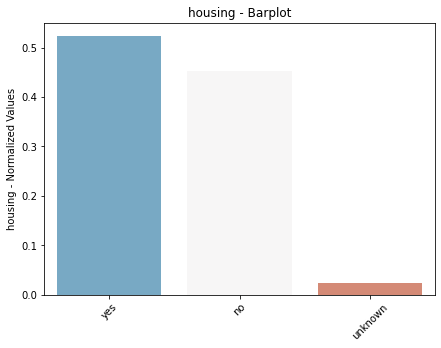

housing - Value Counts
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


In [50]:
bargraph('housing', figsize=(7,5), rotation=45)

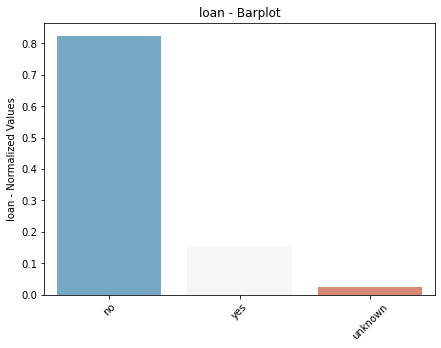

loan - Value Counts
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


In [51]:
bargraph('loan', figsize=(7,5), rotation=45)

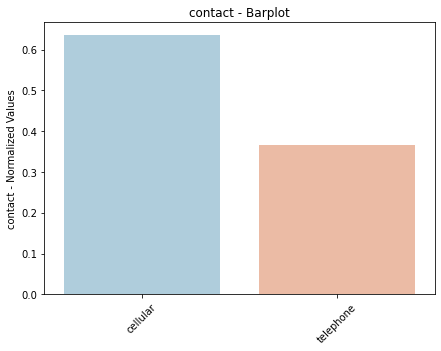

contact - Value Counts
cellular     26135
telephone    15041
Name: contact, dtype: int64


In [52]:
bargraph('contact', figsize=(7,5), rotation=45)

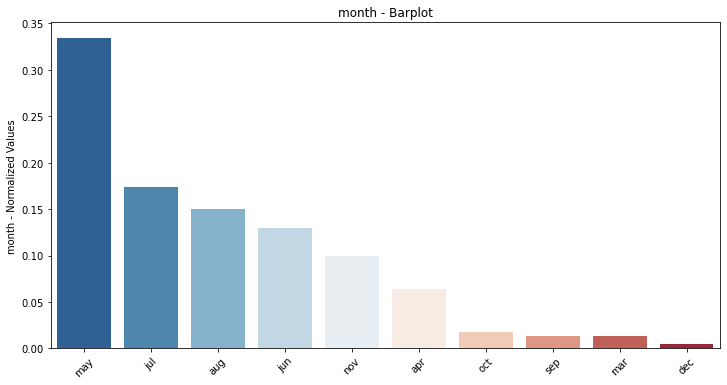

month - Value Counts
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [53]:
bargraph('month', rotation=45)

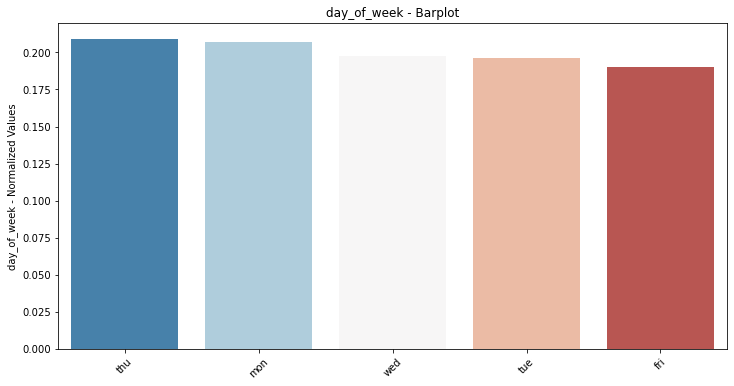

day_of_week - Value Counts
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


In [54]:
bargraph('day_of_week', rotation=45)

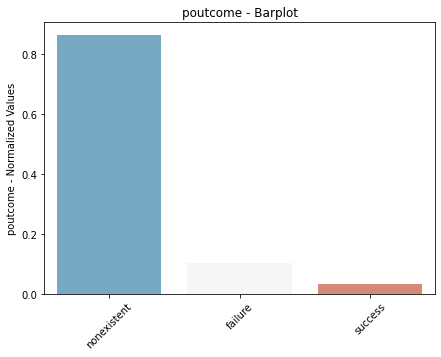

poutcome - Value Counts
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


In [55]:
bargraph('poutcome', figsize=(7,5), rotation=45)

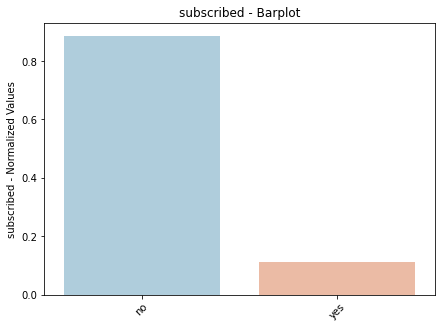

subscribed - Value Counts
no     36537
yes     4639
Name: subscribed, dtype: int64


In [56]:
bargraph('subscribed', figsize=(7,5), rotation=45)

As already observed, several attributes have quite an imbalanced distribution (job, marital, education, default, loan, month, poutcome), including the Target Variable **subscribed**.  

No mistakes or wrongly recorded data have been found, although some variables have a very low number of values in few categories. This, although the data is not wrong per se, can create some problems during the following statistical analysis. Therefore, I'll perform the transformations below:
* **job**: group *illiterate* and *unknown*
* **default**: group *yes* and *unknown*

In [57]:
data.education = data.education.str.replace('illiterate', 'unknown')
data.education = data.education.str.replace('unknown', 'unknown/illiterate')
data.default = data.default.str.replace('yes', 'unknown')
data.default = data.default.str.replace('unknown', 'unknown/yes')

In [58]:
print('Dataset shape after cleaning:', data.shape)

Dataset shape after cleaning: (41176, 20)


### 2.2. EDA - Exploratory Data Analysis <a name=eda></a> 

In [59]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
print('Libraries successfully imported.')

Libraries successfully imported.


#### 2.2.1. Examine Relationships between Categorical Variables and the Target

In [60]:
data.describe(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')

To check for possible correlations between the target and categorical predictors, I will use the following visual and statistical techniques:
* Stacked Bar Charts
* Cross Tables
* Cramer’s V metric  

The assumptions for Cramer's V are the followings, which are met:
1. Variables of interest are categorical
2. 2 or more unique values per category  

Cramer's V is a measure of the association between variables, based on the chi-square test. Chi-square test assumptions are below:
1. Categories of the variables are mutually exclusive.
2. Observations must be independent.
3. Variables are categorical, either nominal or ordinal.
4. In contingency tables, values in each cell should be 5 or more in at least 80% of the cells, and no cell should have a value less than one.

The first 3 conditions for the chi-square test are met. Let's build contingency tables to check for the 4th assumptions.

In [61]:
# Cross table
def contingency_table(attribute, normalize='index'):
    global crosstable
    if normalize in ['all', 'index', 'columns', True]:
        crosstable = round(pd.crosstab(data[attribute], data.subscribed, normalize=normalize)*100,2)
        for column in crosstable.columns:
            crosstable[column] = crosstable[column].apply(lambda x: str(x)+'%')
    else:
        crosstable = pd.crosstab(data[attribute], data.subscribed, normalize=normalize)
    crosstable = crosstable.T
    return crosstable

contingency_table('job', normalize=False)

job         admin.  blue-collar  entrepreneur  housemaid  management  retired  \
subscribed                                                                      
no            9068         8615          1332        954        2596     1284   
yes           1351          638           124        106         328      434   

job         self-employed  services  student  technician  unemployed  unknown  
subscribed                                                                     
no                   1272      3644      600        6009         870      293  
yes                   149       323      275         730         144       37

In [62]:
contingency_table('marital', normalize=False)

marital     divorced  married  single  unknown
subscribed                                    
no              4135    22390    9944       68
yes              476     2531    1620       12

In [63]:
contingency_table('education', normalize=False)

education   basic.4y  basic.6y  basic.9y  high.school  professional.course  \
subscribed                                                                   
no              3748      2103      5572         8481                 4645   
yes              428       188       473         1031                  595   

education   university.degree  unknown/illiterate  
subscribed                                         
no                      10495                1493  
yes                      1669                 255

In [64]:
contingency_table('default', normalize=False)

default        no  unknown/yes
subscribed                    
no          28381         8156
yes          4196          443

In [65]:
contingency_table('housing', normalize=False)

housing        no  unknown    yes
subscribed                       
no          16590      883  19064
yes          2025      107   2507

In [66]:
contingency_table('loan', normalize=False)

loan           no  unknown   yes
subscribed                      
no          30089      883  5565
yes          3849      107   683

In [67]:
contingency_table('contact', normalize=False)

contact     cellular  telephone
subscribed                     
no             22283      14254
yes             3852        787

In [68]:
contingency_table('month', normalize=False)

month        apr   aug  dec   jul   jun  mar    may   nov  oct  sep
subscribed                                                         
no          2092  5521   93  6521  4759  270  12881  3684  402  314
yes          539   655   89   648   559  276    886   416  315  256

In [69]:
contingency_table('day_of_week', normalize=False)

day_of_week   fri   mon   thu   tue   wed
subscribed                               
no           6980  7665  7574  7133  7185
yes           846   847  1044   953   949

In [70]:
contingency_table('poutcome', normalize=False)

poutcome    failure  nonexistent  success
subscribed                               
no             3647        32411      479
yes             605         3140      894

In all contingency tables, there are not cells with a value less than 5: all assumptions are met, so we can move forward with our analysis using Cramer's V as the metric to measure the associations between variables, alongside with Stacked Bar Charts, and Cross Tables.

___

In [71]:
contingency_table('job')

job         admin. blue-collar entrepreneur housemaid management retired  \
subscribed                                                                 
no          87.03%       93.1%       91.48%     90.0%     88.78%  74.74%   
yes         12.97%        6.9%        8.52%     10.0%     11.22%  25.26%   

job        self-employed services student technician unemployed unknown  
subscribed                                                               
no                89.51%   91.86%  68.57%     89.17%      85.8%  88.79%  
yes               10.49%    8.14%  31.43%     10.83%      14.2%  11.21%

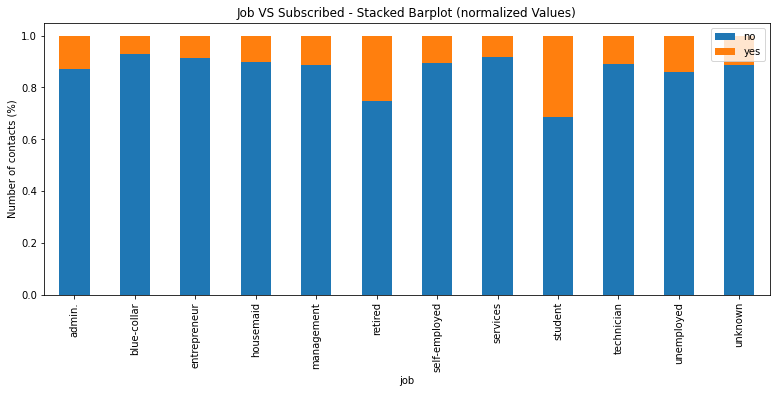

In [72]:
# Stacked Barplot
def stacked_barplot(attribute, kind='bar', figsize=(13,5)):
    crosstable = pd.crosstab(data[attribute], data.subscribed, normalize='index')
    crosstable.plot(kind=kind, stacked=True, figsize=figsize)
    plt.title('{} VS Subscribed - Stacked Barplot (normalized Values)'.format(attribute.capitalize()))
    plt.ylabel('Number of contacts (%)')
    plt.xlabel(attribute)
    plt.legend(loc='best')
    plt.show()

stacked_barplot('job')

In [73]:
# Cross table
contingency_table('marital')

marital    divorced married  single unknown
subscribed                                 
no           89.68%  89.84%  85.99%   85.0%
yes          10.32%  10.16%  14.01%   15.0%

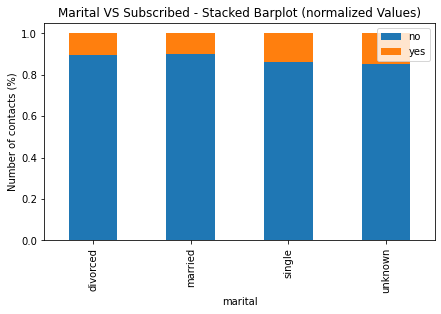

In [74]:
stacked_barplot('marital', figsize=(7,4))

In [75]:
# Cross table
contingency_table('education')

education  basic.4y basic.6y basic.9y high.school professional.course  \
subscribed                                                              
no           89.75%   91.79%   92.18%      89.16%              88.65%   
yes          10.25%    8.21%    7.82%      10.84%              11.35%   

education  university.degree unknown/illiterate  
subscribed                                       
no                    86.28%             85.41%  
yes                   13.72%             14.59%

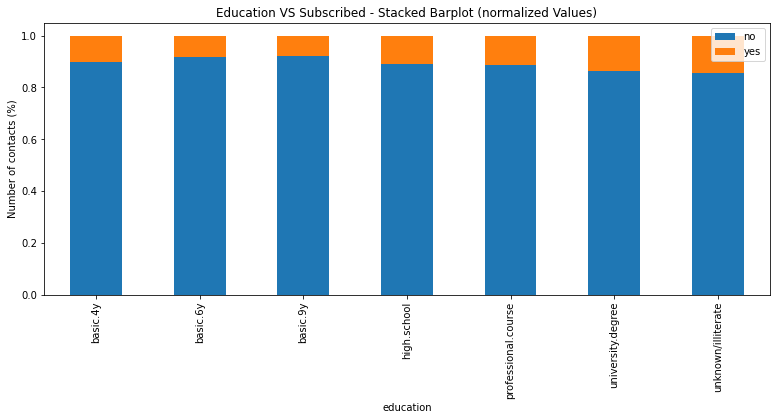

In [76]:
stacked_barplot('education')

In [77]:
# Cross table
contingency_table('default')

default         no unknown/yes
subscribed                    
no          87.12%      94.85%
yes         12.88%       5.15%

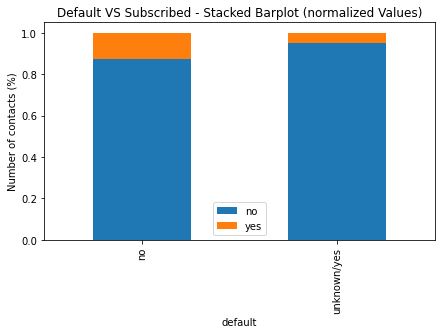

In [78]:
stacked_barplot('default', figsize=(7,4))

In [79]:
# Cross table
contingency_table('housing')

housing         no unknown     yes
subscribed                        
no          89.12%  89.19%  88.38%
yes         10.88%  10.81%  11.62%

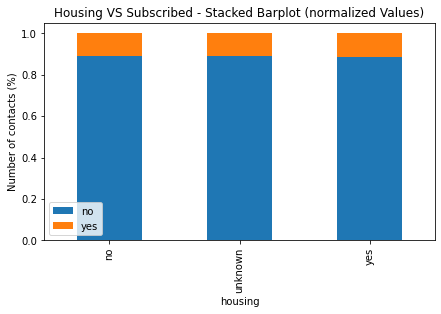

In [80]:
stacked_barplot('housing', figsize=(7,4))

In [81]:
# Cross table
contingency_table('loan')

loan            no unknown     yes
subscribed                        
no          88.66%  89.19%  89.07%
yes         11.34%  10.81%  10.93%

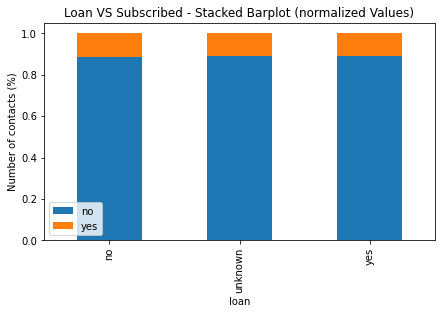

In [82]:
stacked_barplot('loan', figsize=(7,4))

In [83]:
# Cross table
contingency_table('contact')

contact    cellular telephone
subscribed                   
no           85.26%    94.77%
yes          14.74%     5.23%

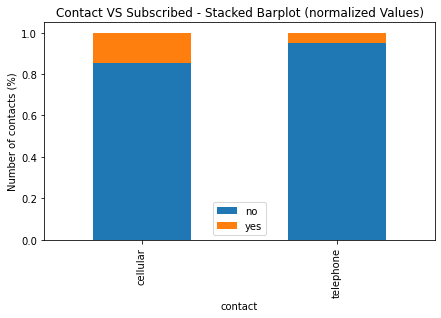

In [84]:
stacked_barplot('contact', figsize=(7,4))

In [85]:
# Cross table
contingency_table('month')

month          apr     aug    dec     jul     jun     mar     may     nov  \
subscribed                                                                  
no          79.51%  89.39%  51.1%  90.96%  89.49%  49.45%  93.56%  89.85%   
yes         20.49%  10.61%  48.9%   9.04%  10.51%  50.55%   6.44%  10.15%   

month          oct     sep  
subscribed                  
no          56.07%  55.09%  
yes         43.93%  44.91%

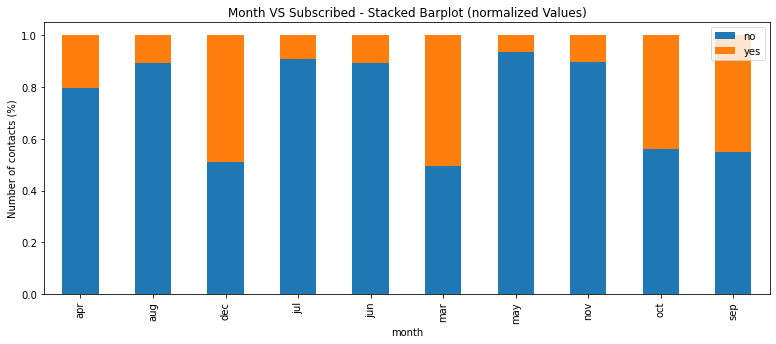

In [86]:
stacked_barplot('month')

In [87]:
# Cross table
contingency_table('day_of_week')

day_of_week     fri     mon     thu     tue     wed
subscribed                                         
no           89.19%  90.05%  87.89%  88.21%  88.33%
yes          10.81%   9.95%  12.11%  11.79%  11.67%

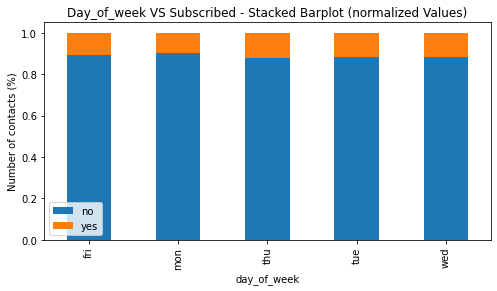

In [88]:
stacked_barplot('day_of_week', figsize=(8,4))

In [89]:
# Cross table
contingency_table('poutcome')

poutcome   failure nonexistent success
subscribed                            
no          85.77%      91.17%  34.89%
yes         14.23%       8.83%  65.11%

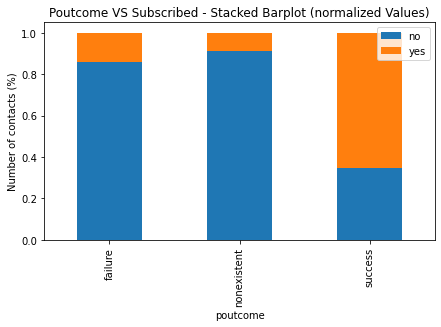

In [90]:
stacked_barplot('poutcome', figsize=(7,4))

___

In [91]:
# Create a dictionary to store Cramer's V metric
keylist = data.select_dtypes('object').columns[:-1].tolist()
cramersv_dict = {k: None for k in keylist}

# Calculate Cramer's V metric by definining a function
def cramersv(attribute):
    #cross table with the observed frequencies (i.e. number of occurrences and not percentages)
    crosstable = pd.crosstab(data[attribute], data.subscribed)
    # Pearson chi-square statistic for Chi-squared test statistic
    X2 = stats.chi2_contingency(crosstable)[0]
    # sample size
    n = np.sum(crosstable).sum()
    # minimum between rows and columns -1
    minDim = min(crosstable.shape)-1
    #calculate Cramer's V 
    V = np.sqrt((X2/n*minDim))
    # Store Cramer's V in the dictionary
    cramersv_dict.update({attribute:V})
    print('{} - Cramer\'s V: {}.'.format(attribute, V))
    
for column in data.select_dtypes('object').columns[:-1]:
    cramersv(column)

job - Cramer's V: 0.15282965081945582.
marital - Cramer's V: 0.05464603271418174.
education - Cramer's V: 0.06824783858363896.
default - Cramer's V: 0.09926186016646155.
housing - Cramer's V: 0.011809059110264421.
loan - Cramer's V: 0.005166959501193496.
contact - Cramer's V: 0.14469445647307996.
month - Cramer's V: 0.2745181708989649.
day_of_week - Cramer's V: 0.0251545850635046.
poutcome - Cramer's V: 0.3205202470466484.


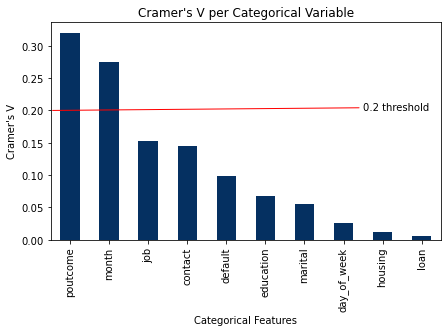

In [92]:
cramersv_df = pd.DataFrame.from_dict(cramersv_dict, orient='index').reset_index()
cramersv_df.rename(columns={0:'Cramer\'s V', 'index':'Categorical Features'}, inplace=True)
cramersv_df.sort_values(by='Cramer\'s V', ascending=False, inplace=True)
cramersv_df.set_index('Categorical Features', inplace=True)
cramersv_df.plot(kind='bar', legend=None, figsize=(7,4), cmap='RdBu_r')
plt.title('Cramer\'s V per Categorical Variable')
plt.ylabel('Cramer\'s V')
plt.annotate('0.2 threshold', xy=(-0.5,0.2), xytext=(7.5,0.2), arrowprops=dict(arrowstyle='-', connectionstyle='arc3', lw=1,
                                                                   color='red'))
plt.show()

To select significant features, I'll keep only those variables with a Cramer's V greater than 0.2 (moderate association):
* poutcome
* month

#### 2.2.2. Examine Relationships between Numeric-Type Variables and the Target

In [93]:
# Encode the Target Variable
lab_encoder = LabelEncoder().fit(data.subscribed)
data['subscribed'] = lab_encoder.transform(data.subscribed)
lab_encoder.classes_

array(['no', 'yes'], dtype=object)

In [94]:
data['subscribed'].value_counts(normalize=True)

0    0.887337
1    0.112663
Name: subscribed, dtype: float64

None of the numeric-type variables are normally distributed, therefore a metric like Point-Biserial Correlation (mathematically equivalent to the Pearson correlation) is not valid (normality of the continuous variables is one of the key assumptions for Point-biserial Correlation).

Therefore, to estimate potential associations between the numeric-type and the categorical variable, I'll use the **Kruskal-Wallis H test**, that is the non-parametric version of one-way ANOVA. This approach consists in measuring the variance in each group and comparing it to the overall population variance. If there's a big difference between the variance within the groups and the variation between the group means, it means that the variables are strongly correlated (the numeric variables can explain the target variable). If the variables have no correlation, then the variance in the groups is expected to be similar to the population variance. Since **Kruskal-Wallis H test** is a non-parametric method, it does not assume a normal distribution of the variables, nor it makes any other key assumptions on the data distribution.  
**Kruskal-Wallis H test** significance level = 5%

**Kruskal-Wallis H test** will output whether there is a significant difference between groups, that is if the numeric-type variable has some impact in explaining the categorical target variable.

In [95]:
def kruskal_wallis_h_test(attribute):
    group_1 = data[data.subscribed == 0][attribute]
    group_2 = data[data.subscribed == 1][attribute]
    test_st, p_val = stats.kruskal(group_1, group_2)
    
    print('Kruskal-Wallis H-test results for "{}" and "subscribed" variables:'.format(attribute))
    print("Test-Statistic:", test_st)
    print("P-Value:", p_val)
    if p_val <= 0.05:
        print("Reject NULL hypothesis - Significant differences exist between groups.")
        print('The continuous variable has some impact over the target variable.')
        print('')
    else:
        print("Accept NULL hypothesis - No significant difference between groups.")
        print("The continuous variable has no impact over the target.")
        print('')
              
for var in data.select_dtypes('number').columns[:-1]:
    kruskal_wallis_h_test(var)

Kruskal-Wallis H-test results for "age" and "subscribed" variables:
Test-Statistic: 5.843156420996497
P-Value: 0.015637749222475184
Reject NULL hypothesis - Significant differences exist between groups.
The continuous variable has some impact over the target variable.

Kruskal-Wallis H-test results for "duration" and "subscribed" variables:
Test-Statistic: 5008.952641567334
P-Value: 0.0
Reject NULL hypothesis - Significant differences exist between groups.
The continuous variable has some impact over the target variable.

Kruskal-Wallis H-test results for "campaign" and "subscribed" variables:
Test-Statistic: 166.83794105975488
P-Value: 3.629350163987945e-38
Reject NULL hypothesis - Significant differences exist between groups.
The continuous variable has some impact over the target variable.

Kruskal-Wallis H-test results for "previous" and "subscribed" variables:
Test-Statistic: 1662.3956401363578
P-Value: 0.0
Reject NULL hypothesis - Significant differences exist between groups.
The

All p-values are less than the Significance level (5%): we can reject the Null Hypothesis (the median is equal across all groups = no association between variables) for all numeric-type variables. In other words, we can say that all numeric-type variables have some type of correlation, and explanatory value, over that target. 

**duration** is the variable with the greatest Kruskal-Wallis test statistic value: so it's the most associated variable with the target. Unfortunately, the duration of a call is not a known variable at the time of attempting a prediction, so it cannot be used as one of the predictors. Therefore, I'll drop **duration** and include in my feature selection all other numeric-type variables.

In [96]:
features = data[['poutcome', 'month', 'age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed']]
features.shape

(41176, 10)

Feature set is made of 41,176 observations (instances of call) and 10 features.

In [97]:
target = data['subscribed']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed, dtype: int32

###  2.3. Feature Engineering and Variable Transformations <a name = featureengineering></a>

In [98]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
print('Libraries successfully imported.')

Libraries successfully imported.


In [99]:
features.head()

poutcome month  age  campaign  previous  emp.var.rate  cons.price.idx  \
0  nonexistent   may   56         1         0           1.1          93.994   
1  nonexistent   may   57         1         0           1.1          93.994   
2  nonexistent   may   37         1         0           1.1          93.994   
3  nonexistent   may   40         1         0           1.1          93.994   
4  nonexistent   may   56         1         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

I'll perform One-Hot Encoding for nominal variables (I'll drop one column per each feature to avoid multi-collinearity issues).

In [100]:
poutcome_enc = pd.get_dummies(features['poutcome'], drop_first=True) # drop the first column
month_enc = pd.get_dummies(features['month'], drop_first=True) # drop the first column
feat_enc = pd.concat([poutcome_enc, month_enc], axis=1)
feat_enc.head()

nonexistent  success  aug  dec  jul  jun  mar  may  nov  oct  sep
0            1        0    0    0    0    0    0    1    0    0    0
1            1        0    0    0    0    0    0    1    0    0    0
2            1        0    0    0    0    0    0    1    0    0    0
3            1        0    0    0    0    0    0    1    0    0    0
4            1        0    0    0    0    0    0    1    0    0    0

In [101]:
feat_enc.columns

Index(['nonexistent', 'success', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'],
      dtype='object')

In [102]:
# Drop the categorical features and concatenate the encoded variables
feature_set = features.drop(['poutcome', 'month'], axis=1) 
feature_set = pd.concat([feature_set, feat_enc], axis=1)
feature_set.describe().T.head(8)

count         mean        std       min       25%       50%  \
age             41176.0    40.023800  10.420680    17.000    32.000    38.000   
campaign        41176.0     2.567879   2.770318     1.000     1.000     2.000   
previous        41176.0     0.173013   0.494964     0.000     0.000     0.000   
emp.var.rate    41176.0     0.081922   1.570883    -3.400    -1.800     1.100   
cons.price.idx  41176.0    93.575720   0.578839    92.201    93.075    93.749   
cons.conf.idx   41176.0   -40.502863   4.627860   -50.800   -42.700   -41.800   
euribor3m       41176.0     3.621293   1.734437     0.634     1.344     4.857   
nr.employed     41176.0  5167.034870  72.251364  4963.600  5099.100  5191.000   

                     75%       max  
age               47.000    98.000  
campaign           3.000    56.000  
previous           0.000     7.000  
emp.var.rate       1.400     1.400  
cons.price.idx    93.994    94.767  
cons.conf.idx    -36.400   -26.900  
euribor3m          4.961     5.045  
nr.employed     5228.100  5228.100

Numerical features are on a very different scale; since classification algorithms don't assume a Gaussian distribution of the data, I apply Min-Max scaling approach to bring all features on the same scale. Before scaling the features, I divide the dataset into train and test sets.

In [103]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
train_idx, test_idx = next(sss.split(feature_set, target))
train_idx.shape, test_idx.shape

((32940,), (8236,))

In [104]:
train_set = pd.concat([feature_set.loc[train_idx.tolist()], target.loc[train_idx.tolist()]], axis=1)
train_set.head()

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
3368    30         1         0           1.1          93.994          -36.4   
11479   34         4         0           1.4          94.465          -41.8   
23014   56         4         0           1.4          93.444          -36.1   
28556   41         1         1          -1.8          93.075          -47.1   
2634    31         2         0           1.1          93.994          -36.4   

       euribor3m  nr.employed  nonexistent  success  aug  dec  jul  jun  mar  \
3368       4.860       5191.0            1        0    0    0    0    0    0   
11479      4.959       5228.1            1        0    0    0    0    1    0   
23014      4.965       5228.1            1        0    1    0    0    0    0   
28556      1.415       5099.1            0        0    0    0    0    0    0   
2634       4.856       5191.0            1        0    0    0    0    0    0   

       may  nov  oct  sep  subscribed  
3368     1    0    0    0           0  
11479    0    0    0    0           0  
23014    0    0    0    0           0  
28556    0    0    0    0           0  
2634     1    0    0    0           1

In [105]:
train_set.shape

(32940, 20)

In [106]:
train_set.subscribed.value_counts(normalize=True)

0    0.887341
1    0.112659
Name: subscribed, dtype: float64

In [107]:
train_set.subscribed.value_counts(normalize=False)

0    29229
1     3711
Name: subscribed, dtype: int64

In [108]:
test_set = pd.concat([feature_set.loc[test_idx.tolist()], target.loc[test_idx.tolist()]], axis=1)
test_set.head()

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
4316    53         1         0           1.1          93.994          -36.4   
39167   25         3         1          -1.8          93.369          -34.8   
7640    47         5         0           1.1          93.994          -36.4   
23168   32        10         0           1.4          93.444          -36.1   
22029   45         3         0           1.4          93.444          -36.1   

       euribor3m  nr.employed  nonexistent  success  aug  dec  jul  jun  mar  \
4316       4.856       5191.0            1        0    0    0    0    0    0   
39167      0.653       5008.7            0        0    0    0    0    0    1   
7640       4.864       5191.0            1        0    0    0    0    0    0   
23168      4.965       5228.1            1        0    1    0    0    0    0   
22029      4.964       5228.1            1        0    1    0    0    0    0   

       may  nov  oct  sep  subscribed  
4316     1    0    0    0           0  
39167    0    0    0    0           0  
7640     1    0    0    0           0  
23168    0    0    0    0           0  
22029    0    0    0    0           0

In [109]:
test_set.shape

(8236, 20)

In [110]:
test_set.subscribed.value_counts(normalize=True)

0    0.887324
1    0.112676
Name: subscribed, dtype: float64

In [111]:
test_set.subscribed.value_counts()

0    7308
1     928
Name: subscribed, dtype: int64

In [112]:
minmax = MinMaxScaler()
train_set_scld = minmax.fit_transform(train_set)
test_set_scld = minmax.transform(test_set)
pd.DataFrame(train_set_scld, columns=train_set.columns).describe().T.head(8)

count      mean       std  min       25%       50%  \
age             32940.0  0.284500  0.128593  0.0  0.185185  0.259259   
campaign        32940.0  0.028227  0.049820  0.0  0.000000  0.018182   
previous        32940.0  0.028896  0.082469  0.0  0.000000  0.000000   
emp.var.rate    32940.0  0.724555  0.327504  0.0  0.333333  0.937500   
cons.price.idx  32940.0  0.534665  0.225561  0.0  0.340608  0.484412   
cons.conf.idx   32940.0  0.431032  0.194190  0.0  0.338912  0.376569   
euribor3m       32940.0  0.676661  0.393257  0.0  0.160961  0.957379   
nr.employed     32940.0  0.768761  0.273267  0.0  0.512287  0.859735   

                     75%  max  
age             0.370370  1.0  
campaign        0.036364  1.0  
previous        0.000000  1.0  
emp.var.rate    1.000000  1.0  
cons.price.idx  0.698753  1.0  
cons.conf.idx   0.602510  1.0  
euribor3m       0.980957  1.0  
nr.employed     1.000000  1.0

In [113]:
pd.DataFrame(test_set_scld, columns=test_set.columns).describe().T.head(8)

count      mean       std  min       25%       50%       75%  \
age             8236.0  0.283224  0.128882  0.0  0.185185  0.259259  0.370370   
campaign        8236.0  0.029628  0.052496  0.0  0.000000  0.018182  0.036364   
previous        8236.0  0.028594  0.082598  0.0  0.000000  0.000000  0.000000   
emp.var.rate    8236.0  0.728782  0.326316  0.0  0.333333  0.937500  1.000000   
cons.price.idx  8236.0  0.540060  0.225620  0.0  0.340608  0.652767  0.698753   
cons.conf.idx   8236.0  0.430087  0.191407  0.0  0.338912  0.376569  0.602510   
euribor3m       8236.0  0.679543  0.393022  0.0  0.160961  0.957379  0.980957   
nr.employed     8236.0  0.770606  0.272752  0.0  0.512287  0.859735  1.000000   

                     max  
age             1.000000  
campaign        0.745455  
previous        1.166667  
emp.var.rate    1.000000  
cons.price.idx  1.000000  
cons.conf.idx   1.000000  
euribor3m       1.000000  
nr.employed     1.000000

## 3. Model Development <a name="modeldevelopment"></a>

In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix,\
precision_recall_curve, classification_report, accuracy_score, auc
import pickle
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
print('Libraries successfully imported.')

Libraries successfully imported.


### 3.1. Classifier 1 - K-Nearest Neighbors (KNN) <a name='knn'></a>

Since KNN is a non-parametric model, it doesn't make any assumptions on data distribution.  
To fit our KNN model, I'll follow the approach below:
* Fitting the model on the training set, using Grid_Search_CV method to find the best hyperparameters with stratified Cross Validation technique.
* I set the GridSearchCV scoring argument equal to "f1", where f1 is F-1 score (the harmonic average of precision and recall) of the positive class (Subscribed = 1 (Yes)).
* Calculate following performance metrics using the test set: Confusion Matrix, Precision, Recall, F1 Score, Receiver Operating Characteristic and Precision/Recall curves, and Area Under the Curve scores.

In [115]:
# stratified cross validation object
skf = StratifiedKFold(shuffle=True, n_splits=5, random_state=123)
# divide train_set in x_train and y_train
x_train = train_set.drop(['subscribed'], axis=1)
y_train = train_set['subscribed']

```python
# create a pipeline with min-max scaler and K-Nearest Neighbors classifier 
knn_pipe = Pipeline([('minmax_scaler', MinMaxScaler()), ('knn_classifier', KNeighborsClassifier())])
# Hyperparameters grid
h_params = {'knn_classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
            'knn_classifier__weights': ['uniform', 'distance'],
            'knn_classifier__p': [1, 2]} # p=1 manhattan_distance; p=2 euclidean_distance
# Create a grid search CV model
knn_grid = GridSearchCV(knn_pipe, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
knn_grid.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),  
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()), ('knn_classifier', KNeighborsClassifier())]),
             param_grid={'knn_classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'knn_classifier__p': [1, 2],
                         'knn_classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./knn_grid_model.p', 'wb') as f:
    pickle.dump(knn_grid, f)

f.close()
```

In [116]:
# load the the Grid Search CV object
with open('./knn_grid_model.p', 'rb') as f:
    knn_grid = pickle.load(f)
    
f.close()

In [117]:
# Check the best hyperparameters
knn_grid.best_params_

{'knn_classifier__n_neighbors': 9,
 'knn_classifier__p': 1,
 'knn_classifier__weights': 'uniform'}

The optimum hyperparameters are:
* Number of Neighbors (K): 9.
* Type of Distance: Manhatthan Distance (L1).
* Weights of Neighbors: uniform (all points in each neighborhood are weighted equally).

In [118]:
# store the best estimator
knn_model = knn_grid.best_estimator_
knn_model

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=9, p=1))])

In [119]:
# divide test_set in x_test and y_test
x_test = test_set.drop(['subscribed'], axis=1)
y_test = test_set['subscribed']
# Outputs predictions with best estimator
knn_predictions = knn_model.predict(x_test)
knn_predictions.shape

(8236,)

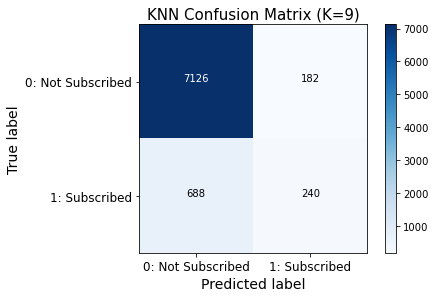

In [120]:
#Define a function for better visualization of Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    

knn_cm = confusion_matrix(y_test, knn_predictions, labels=[0,1])
plot_confusion_matrix(knn_cm, classes=['0: Not Subscribed', '1: Subscribed'], title='KNN Confusion Matrix (K=9)')

In [121]:
print('KNN: Classification Report')
print(classification_report(y_test, knn_predictions, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))
knn_probs = knn_model.predict_proba(x_test)
print('ROC - Area Under the Curve: ', round(roc_auc_score(y_test, knn_probs[:,1]),2))

KNN: Classification Report
                precision    recall  f1-score   support

Not Subscribed       0.91      0.98      0.94      7308
    Subscribed       0.57      0.26      0.36       928

      accuracy                           0.89      8236
     macro avg       0.74      0.62      0.65      8236
  weighted avg       0.87      0.89      0.88      8236

ROC - Area Under the Curve:  0.75


KNN Classifier worked well on predicting the majority class, but, as expected, it has problems in predicting the minority/positive class.  
Let's plot ROC and Precision/Recall curves to look further into the results.

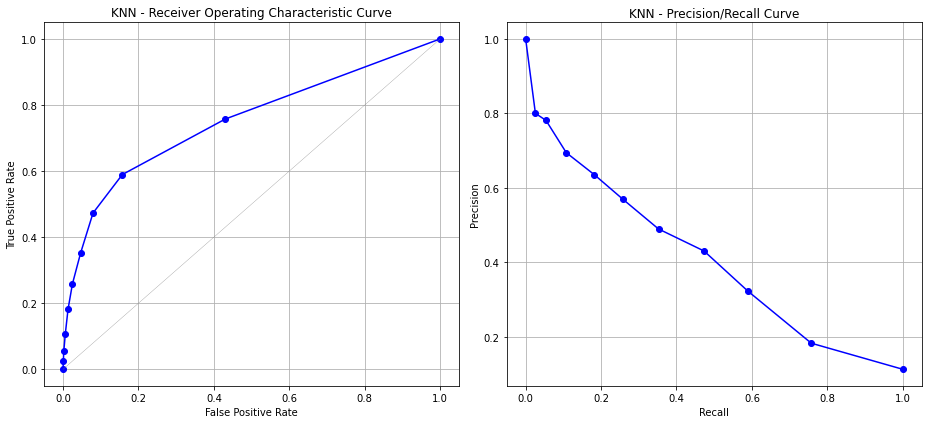

In [122]:
# plot ROC curve and Precision/Recall curves
fpr, tpr, thresholds = roc_curve(y_test, knn_probs[:,1])
precision, recall, thresholds = precision_recall_curve(y_test, knn_probs[:,1])

fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr, tpr, marker='o', color='blue')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.set(title='KNN - Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)

ax2 = ax_list[1]
ax2.plot(recall, precision, marker='o', color='blue')
ax2.set(title='KNN - Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)

plt.tight_layout()

It seems that changing the decision thresholds:
* could increase the True Positive Rate without significantly increase the False Positive Rate
* could increase the Recall, although the Precision might significantly decrease.

Let's try to move the probability threshold, and calculate the best trade off between:
* Sensitivity (True Positive Rate) of positive class and the False Positive Rate: <a href="https://en.wikipedia.org/wiki/Youden%27s_J_statistic">Youden’s J statistic</a> (True Positive Rate – False Positive Rate).
* Precision and Recall: F1 Score (harmonic mean between Precision and Recall).

In [123]:
fpr, tpr, thresholds_roc = roc_curve(y_test, knn_probs[:,1])
j_stat = []
for t in range(thresholds_roc.shape[0]):
    j_stat.append(tpr[t] - fpr[t])

best_j_idx = j_stat.index(max(j_stat))
print("Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc[best_j_idx], max(j_stat)))

Best threshold: 0.2222222222222222 . Youden's J statistic: 0.43221469622331693


In [124]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, knn_probs[:,1])
f1 = []
for t in range(thresholds_pr.shape[0]):
    f1.append(2 * (precision[t]*recall[t]) / (precision[t]+recall[t]))

best_f1_idx = f1.index(max(f1))
print("Best threshold: {} . F-1 Score: {}".format(thresholds_pr[best_f1_idx], max(f1)))

Best threshold: 0.3333333333333333 . F-1 Score: 0.4507186858316222


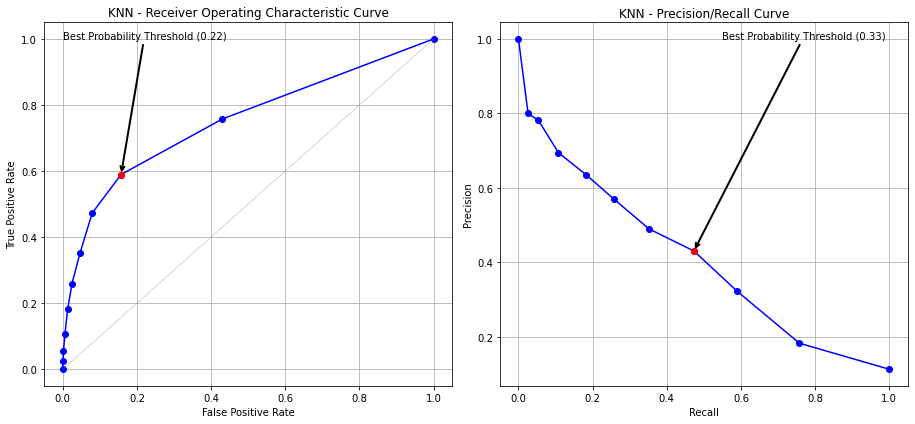

In [125]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr, tpr, marker='o', color='blue')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr[best_j_idx], tpr[best_j_idx], marker='o', color='red')
ax1.set(title='KNN - Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.annotate('Best Probability Threshold (0.22)',
            xy=(fpr[best_j_idx], tpr[best_j_idx]),
            xytext=(0.0,1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax2 = ax_list[1]
ax2.plot(recall, precision, marker='o', color='blue')
ax2.set(title='KNN - Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.plot(recall[best_f1_idx], precision[best_f1_idx], marker='o', color='red')
ax2.grid(True)
ax2.annotate('Best Probability Threshold (0.33)',
            xy=(recall[best_f1_idx], precision[best_f1_idx]),
            xytext=(0.55,1.0),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.tight_layout()

In [126]:
# set threwshold at 0.33 and make new predictions
knn_preds_newtrs_1 = ((knn_model.predict_proba(x_test)[:,1] >= thresholds_roc[best_j_idx]).astype(bool)).astype(int)
knn_preds_newtrs_1

array([0, 1, 0, ..., 1, 0, 0])

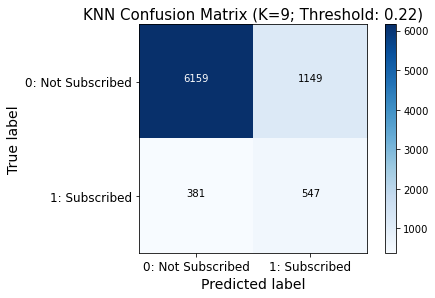

In [127]:
knn_cm_newtrs_1= confusion_matrix(y_test, knn_preds_newtrs_1, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_1, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=9; Threshold: 0.22)')

In [128]:
print('KNN: Classification Report (K=9; Threshold: 0.22)')
print(classification_report(y_test, knn_preds_newtrs_1, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=9; Threshold: 0.22)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.84      0.89      7308
    Subscribed       0.32      0.59      0.42       928

      accuracy                           0.81      8236
     macro avg       0.63      0.72      0.65      8236
  weighted avg       0.87      0.81      0.84      8236



In [129]:
# set threwshold at 0.2222 and make new predictions
knn_preds_newtrs_2 = ((knn_model.predict_proba(x_test)[:,1] >= thresholds_pr[best_f1_idx]).astype(bool)).astype(int)
knn_preds_newtrs_2.shape

(8236,)

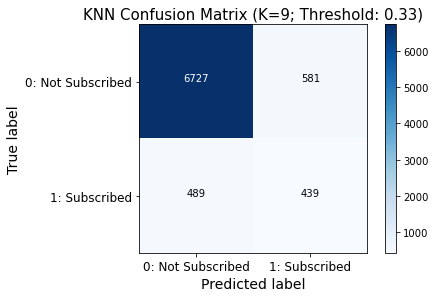

In [130]:
knn_cm_newtrs_2 = confusion_matrix(y_test, knn_preds_newtrs_2, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=9; Threshold: 0.33)')

In [131]:
print('KNN: Classification Report (K=9; Threshold: 0.33)')
print(classification_report(y_test, knn_preds_newtrs_2, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=9; Threshold: 0.33)
                precision    recall  f1-score   support

Not Subscribed       0.93      0.92      0.93      7308
    Subscribed       0.43      0.47      0.45       928

      accuracy                           0.87      8236
     macro avg       0.68      0.70      0.69      8236
  weighted avg       0.88      0.87      0.87      8236



In [132]:
headers = ['Precision - Positive Class', 'Recall - Positive Class', 'F1_Score - Positive Class',
           'Accuracy', 'F1_Score - macro avg']
table_idx = ['Threshold (TH): 0.5 (default)', 'Threshold (TH): 0.22', 'Threshold(TH): 0.33']
metrics_1 = [round(precision_score(y_test, knn_predictions),2),
             round(recall_score(y_test, knn_predictions),2),
             round(f1_score(y_test, knn_predictions),2),
             round(accuracy_score(y_test, knn_predictions),2),
             round(f1_score(y_test, knn_predictions, average = 'macro'),2)]
metrics_2 = [round(precision_score(y_test, knn_preds_newtrs_1),2),
             round(recall_score(y_test, knn_preds_newtrs_1),2),
             round(f1_score(y_test, knn_preds_newtrs_1),2),
             round(accuracy_score(y_test, knn_preds_newtrs_1),2),
             round(f1_score(y_test, knn_preds_newtrs_1, average = 'macro'),2)]
metrics_3 = [round(precision_score(y_test, knn_preds_newtrs_2),2),
             round(recall_score(y_test, knn_preds_newtrs_2),2),
             round(f1_score(y_test, knn_preds_newtrs_2),2),
             round(accuracy_score(y_test, knn_preds_newtrs_2),2),
             round(f1_score(y_test, knn_preds_newtrs_2, average = 'macro'),2)]

knn_report_table = pd.DataFrame(data=[metrics_1, metrics_2, metrics_3], index=table_idx, columns=headers)
print('KNN Report Table')
knn_report_table

KNN Report Table


Precision - Positive Class  \
Threshold (TH): 0.5 (default)                        0.57   
Threshold (TH): 0.22                                 0.32   
Threshold(TH): 0.33                                  0.43   

                               Recall - Positive Class  \
Threshold (TH): 0.5 (default)                     0.26   
Threshold (TH): 0.22                              0.59   
Threshold(TH): 0.33                               0.47   

                               F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                       0.36      0.89   
Threshold (TH): 0.22                                0.42      0.81   
Threshold(TH): 0.33                                 0.45      0.87   

                               F1_Score - macro avg  
Threshold (TH): 0.5 (default)                  0.65  
Threshold (TH): 0.22                           0.65  
Threshold(TH): 0.33                            0.69

Moving the probability threshold to 0.33 seems to bring the best trade-off between Precision and Recall: both F-1 score for the positive class and the macro average are the greatest, whilst the accuracy is only slightly less than the default threshold (0.5).  
There's still some room for improvement though. So I'll try with some resampling techiques to deal with the imbalanced classes:
* Undersampling: Edited Nearest Neighbors
* Oversampling: SMOTE (Synthetic Minority Oversampling Technique)
* Resampling: Edited Nearest Neighbors + SMOTE.

##### Undersampling approach: Edited Nearest Neighbors

Edited Nearest Neighbors locates the majority-class points that are missclassified (using K-Nearest Neighbors classifier), and drops them.  Edited Nearest Neighbors works as follows:
* Pick an example and compute its K nearest neighbors.
* If the example is a majority class instance and is misclassified by its K nearest neighbors, then it is removed from the dataset.
* If the example is a minority class instance and is misclassified by its K nearest neighbors, then the majority class instances among the neighbors are removed.

Edited Nearest Neighbors removes majority-class points that are ambiguous and noisy (that is majority-class points too close to minority-class points), thus creating more distinct classes.  
Edited Nearest Neighbors have some hyperparameters to be tuned: the number of neighbors (k), and the strategy to use in order to exclude samples (kind_sel: that could be either "all", all neighbours will have to agree with the samples of interest to not be misclassified, or "mode", that is  using the majority vote of the neighbours of the samples of interest to not be misclassified). So I will perform the followings:
* Create a Pipeline object with MinMax Scaler, Edited Nearest Neighbours undersampling method, and KNN Classifier.
* Use GridSearchCV method to find out the best hyperparameters for Edited Nearest Neighbours method, and K-Nearest Neighbors model, using the same cross-validation approach as above (undersampling will, almost certainly, increase recall but decrease precision; therefore the model, to perform better, needs to generalize more: I'll use, then, greater vales for K).
* Make predictions using the test set, and compute the relevant out-of-sample metrics.

```python
# import the Pipeline class from imblearn
from imblearn.pipeline import Pipeline
# create a EditedNearestNeighbours object 
enn = EditedNearestNeighbours()
# create a pipeline with min-max scaler, EditedNearestNeighbors undersampling method, and K-Nearest Neighbors classifier
knn_pipe_enn = Pipeline([('minmax_scaler', MinMaxScaler()), ('enn_method', EditedNearestNeighbours()),
                         ('knn_classifier', KNeighborsClassifier())])
# Hyperparameters grid
h_params = {'enn_method__n_neighbors': [1,2,3,4,5,6,7,8,9],
            'enn_method__kind_sel': ['all', 'mode'],
            'knn_classifier__n_neighbors': [19, 21, 23, 25, 27, 29, 31, 32, 33, 35, 37, 39, 41, 43, 45],
            'knn_classifier__weights': ['uniform', 'distance'],
            'knn_classifier__p': [1, 2]} # p=1 manhattan_distance; p=2 euclidean_distance
# Create a grid search CV model
knn_grid_enn = GridSearchCV(knn_pipe_enn, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
knn_grid_enn.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),  
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('enn_method', EditedNearestNeighbours()),
                                       ('knn_classifier', KNeighborsClassifier())]),
             param_grid={'enn_method__kind_sel': ['all', 'mode'],
                         'enn_method__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'knn_classifier__n_neighbors': [19, 21, 23, 25, 27, 29, 31, 32, 33, 35, 37, 39, 41, 43, 45],
                         'knn_classifier__p': [1, 2],
                         'knn_classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./knn_grid_enn.p', 'wb') as f:
    pickle.dump(knn_grid_enn, f)

f.close()
```

In [133]:
# load the the Grid Search CV object
with open('./knn_grid_enn.p', 'rb') as f:
    knn_grid_enn = pickle.load(f)
    
f.close()

In [134]:
# Check the best hyperparameters
knn_grid_enn.best_params_

{'enn_method__kind_sel': 'all',
 'enn_method__n_neighbors': 6,
 'knn_classifier__n_neighbors': 37,
 'knn_classifier__p': 1,
 'knn_classifier__weights': 'uniform'}

The optimum hyperparameters are:
* For Edited Nearest Neighbours:
  * kind_sel: "all" -> All neighbours will have to agree with the samples of interest to not be misclassified.
  * n_neighbors': 6.
* KNN Classifier:
  * Number of Neighbors (K): 37.
  * Type of Distance: Manhatthan Distance (L1).
  * Weights of Neighbors: uniform (all neighbors have same weight).

In [135]:
# let's look into the size of downsampling 
enn = EditedNearestNeighbours(n_neighbors=6)
# divide the scaled train_set in x_train and y_train
train_set_scld = pd.DataFrame(train_set_scld, columns=train_set.columns)
x_train_scld = train_set_scld.drop(['subscribed'], axis=1)
x_enn, y_enn = enn.fit_resample(x_train_scld, y_train)
x_enn.shape, y_enn.shape

((23637, 19), (23637,))

In [136]:
print('Number of observations before undersampling:', y_train.shape[0])
print('Number of observations after undersampling:', y_enn.shape[0])
print('Number of removed observations (majority class):', y_train.shape[0] - y_enn.shape[0])

Number of observations before undersampling: 32940
Number of observations after undersampling: 23637
Number of removed observations (majority class): 9303


In [137]:
# Check the class imbalance
y_enn.value_counts(normalize=True)

0    0.843
1    0.157
Name: subscribed, dtype: float64

In [138]:
# Chech the number of observations per class
y_enn.value_counts()

0    19926
1     3711
Name: subscribed, dtype: int64

In [139]:
# store the best estimator
knn_model_enn = knn_grid_enn.best_estimator_
knn_model_enn

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('enn_method', EditedNearestNeighbours(n_neighbors=6)),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=37, p=1))])

In [140]:
# Outputs predictions with best estimator
knn_pred_enn = knn_model_enn.predict(x_test)
knn_probs_enn = knn_model_enn.predict_proba(x_test)
knn_pred_enn.shape, knn_probs_enn.shape,

((8236,), (8236, 2))

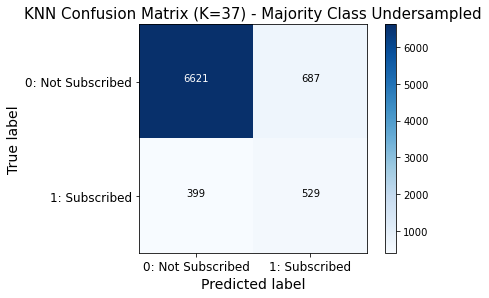

In [141]:
knn_cm_enn = confusion_matrix(y_test, knn_pred_enn, labels=[0,1])
plot_confusion_matrix(knn_cm_enn, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37) - Majority Class Undersampled')

In [142]:
print('KNN: Classification Report (K=37) - Majority Class Undersampled')
print(classification_report(y_test, knn_pred_enn, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))
knn_probs_enn = knn_model_enn.predict_proba(x_test)

KNN: Classification Report (K=37) - Majority Class Undersampled
                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.92      7308
    Subscribed       0.44      0.57      0.49       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [143]:
print('ROC Area Under the Curve - Original DS: ', round(roc_auc_score(y_test, knn_probs[:,1]),2))
print('ROC Area Under the Curve - Undersampled DS: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))

ROC Area Under the Curve - Original DS:  0.75
ROC Area Under the Curve - Undersampled DS:  0.77


In [144]:
precision_enn, recall_enn, thresholds_pr_enn = precision_recall_curve(y_test, knn_probs_enn[:,1])
print('Precision/Recall Area Under the Curve - Original DS: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Undersampled DS: ', round(auc(recall_enn, precision_enn),2))

Precision/Recall Area Under the Curve - Original DS:  0.41
Precision/Recall Area Under the Curve - Undersampled DS:  0.45


In [145]:
knn_report_table.head(3)

Precision - Positive Class  \
Threshold (TH): 0.5 (default)                        0.57   
Threshold (TH): 0.22                                 0.32   
Threshold(TH): 0.33                                  0.43   

                               Recall - Positive Class  \
Threshold (TH): 0.5 (default)                     0.26   
Threshold (TH): 0.22                              0.59   
Threshold(TH): 0.33                               0.47   

                               F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                       0.36      0.89   
Threshold (TH): 0.22                                0.42      0.81   
Threshold(TH): 0.33                                 0.45      0.87   

                               F1_Score - macro avg  
Threshold (TH): 0.5 (default)                  0.65  
Threshold (TH): 0.22                           0.65  
Threshold(TH): 0.33                            0.69

Undersampling the majority class increased both Precision and Recall of the Positive Class, compared to Original-Dataset-Best_Threshold. F1-Score (macro-average), ROC AUC, and Precision/Recall AUC are also greater than before the downsampling.  
Let's compute the best probability threshold for the undersampled dataset, and let's plot ROC and Precision/Recall curves to look further into the results.

In [146]:
fpr_enn, tpr_enn, thresholds_roc_enn = roc_curve(y_test, knn_probs_enn[:,1])
j_stat_enn = []
for t in range(thresholds_roc_enn.shape[0]):
    j_stat_enn.append(tpr_enn[t] - fpr_enn[t])

best_j_idx_enn = j_stat_enn.index(max(j_stat_enn))
print("Undersampled Dataset - Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc_enn[best_j_idx_enn],
                                                                                    max(j_stat_enn)))

Undersampled Dataset - Best threshold: 0.35135135135135137 . Youden's J statistic: 0.4818691844553914


In [147]:
f1_enn = []
for t in range(thresholds_pr_enn.shape[0]):
    f1_enn.append(2 * (precision_enn[t]*recall_enn[t]) / (precision_enn[t]+recall_enn[t]))

best_f1_idx_enn = f1_enn.index(max(f1_enn))
print("Undersampled Dataset - Best threshold: {} . F-1 Score: {}".format(thresholds_pr_enn[best_f1_idx_enn], max(f1_enn)))

Undersampled Dataset - Best threshold: 0.5405405405405406 . F-1 Score: 0.49670743179680144


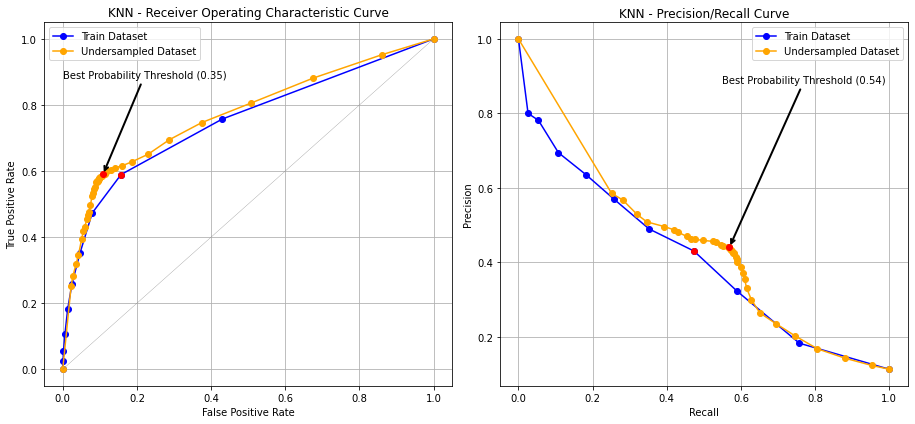

In [148]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr, tpr, marker='o', color='blue', label='Train Dataset')
ax1.plot(fpr_enn, tpr_enn, marker='o', color='orange', label='Undersampled Dataset')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr[best_j_idx], tpr[best_j_idx], marker='o', color='red')
ax1.plot(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn], marker='o', color='red')
ax1.set(title='KNN - Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.legend()
ax1.annotate('Best Probability Threshold (0.35)',
            xy=(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn]),
            xytext=(0.0,0.88),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))


ax2 = ax_list[1]
ax2.plot(recall, precision, marker='o', color='blue', label='Train Dataset')
ax2.plot(recall_enn, precision_enn, marker='o', color='orange', label='Undersampled Dataset')
ax2.plot(recall[best_f1_idx], precision[best_f1_idx], marker='o', color='red')
ax2.plot(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn], marker='o', color='red')
ax2.set(title='KNN - Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)
ax2.legend()
ax2.annotate('Best Probability Threshold (0.54)',
            xy=(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn]),
            xytext=(0.55,0.88),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.tight_layout()

Let's make new predictions using the best probability thresholds, and compute/compare the relevant metrics.

In [149]:
# set threwshold at 0.35 and make new predictions
knn_preds_newtrs_1_enn = ((knn_model_enn.predict_proba(x_test)[:,1]
                           >= thresholds_roc_enn[best_j_idx_enn]).astype(bool)).astype(int)
knn_preds_newtrs_1_enn

array([0, 1, 0, ..., 0, 0, 0])

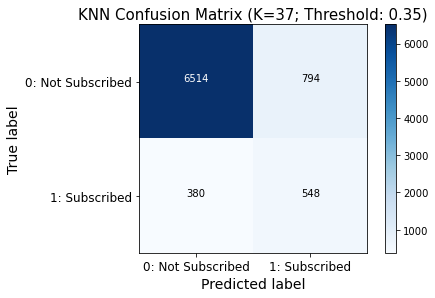

In [150]:
knn_cm_newtrs_1_enn= confusion_matrix(y_test, knn_preds_newtrs_1_enn, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_1_enn, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37; Threshold: 0.35)')

In [151]:
print('KNN: Classification Report (K=37; Threshold: 0.35)')
print(classification_report(y_test, knn_preds_newtrs_1_enn, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=37; Threshold: 0.35)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.89      0.92      7308
    Subscribed       0.41      0.59      0.48       928

      accuracy                           0.86      8236
     macro avg       0.68      0.74      0.70      8236
  weighted avg       0.88      0.86      0.87      8236



In [152]:
# set threwshold at 0.54 and make new predictions
knn_preds_newtrs_2_enn = ((knn_model_enn.predict_proba(x_test)[:,1]
                           >= thresholds_pr_enn[best_f1_idx_enn]).astype(bool)).astype(int)
knn_preds_newtrs_2_enn.shape

(8236,)

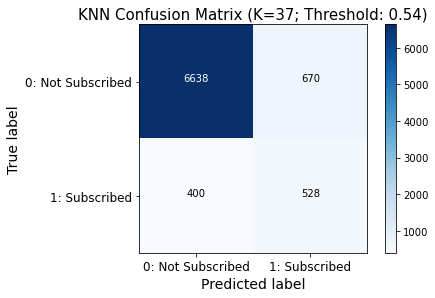

In [153]:
knn_cm_newtrs_2_enn = confusion_matrix(y_test, knn_preds_newtrs_2_enn, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_2_enn, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37; Threshold: 0.54)')

In [154]:
print('KNN: Classification Report (K=37; Threshold: 0.54)')
print(classification_report(y_test, knn_preds_newtrs_2_enn, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=37; Threshold: 0.54)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.93      7308
    Subscribed       0.44      0.57      0.50       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [155]:
headers = ['Precision - Positive Class', 'Recall - Positive Class', 'F1_Score - Positive Class',
           'Accuracy', 'F1_Score - macro avg']
table_enn_idx = ['DS Undersampled (default TH (0.5))', 'DS Undersampled (TH: 0.35)', 'DS Undersampled (TH: 0.54)']
metrics_1_enn = [round(precision_score(y_test, knn_pred_enn),2),
                 round(recall_score(y_test, knn_pred_enn),2),
                 round(f1_score(y_test, knn_pred_enn),2),
                 round(accuracy_score(y_test, knn_pred_enn),2),
                 round(f1_score(y_test, knn_pred_enn, average = 'macro'),2)]
metrics_2_enn = [round(precision_score(y_test, knn_preds_newtrs_1_enn),2),
                 round(recall_score(y_test, knn_preds_newtrs_1_enn),2),
                 round(f1_score(y_test, knn_preds_newtrs_1_enn),2),
                 round(accuracy_score(y_test, knn_preds_newtrs_1_enn),2),
                 round(f1_score(y_test, knn_preds_newtrs_1_enn, average = 'macro'),2)]
metrics_3_enn = [round(precision_score(y_test, knn_preds_newtrs_2_enn),2),
                 round(recall_score(y_test, knn_preds_newtrs_2_enn),2),
                 round(f1_score(y_test, knn_preds_newtrs_2_enn),2),
                 round(accuracy_score(y_test, knn_preds_newtrs_2_enn),2),
                 round(f1_score(y_test, knn_preds_newtrs_2_enn, average = 'macro'),2)]

knn_report_table_enn = pd.DataFrame(data=[metrics_1_enn, metrics_2_enn, metrics_3_enn], index=table_enn_idx, columns=headers)
knn_report_table = pd.concat([knn_report_table, knn_report_table_enn], axis=0)
knn_report_table

Precision - Positive Class  \
Threshold (TH): 0.5 (default)                             0.57   
Threshold (TH): 0.22                                      0.32   
Threshold(TH): 0.33                                       0.43   
DS Undersampled (default TH (0.5))                        0.44   
DS Undersampled (TH: 0.35)                                0.41   
DS Undersampled (TH: 0.54)                                0.44   

                                    Recall - Positive Class  \
Threshold (TH): 0.5 (default)                          0.26   
Threshold (TH): 0.22                                   0.59   
Threshold(TH): 0.33                                    0.47   
DS Undersampled (default TH (0.5))                     0.57   
DS Undersampled (TH: 0.35)                             0.59   
DS Undersampled (TH: 0.54)                             0.57   

                                    F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                            0.36      0.89   
Threshold (TH): 0.22                                     0.42      0.81   
Threshold(TH): 0.33                                      0.45      0.87   
DS Undersampled (default TH (0.5))                       0.49      0.87   
DS Undersampled (TH: 0.35)                               0.48      0.86   
DS Undersampled (TH: 0.54)                               0.50      0.87   

                                    F1_Score - macro avg  
Threshold (TH): 0.5 (default)                       0.65  
Threshold (TH): 0.22                                0.65  
Threshold(TH): 0.33                                 0.69  
DS Undersampled (default TH (0.5))                  0.71  
DS Undersampled (TH: 0.35)                          0.70  
DS Undersampled (TH: 0.54)                          0.71

Undersampling the Dataset, and moving the probability threshold to 0.54, make the best Precision/Recall trade-off, with the greatest F1-Scores for both positive class and macro-averaged, and same accuracy. The model trained on the Undersampled dataset, with probability threshold at 0.54, is the best peforming classifier until now.

##### Oversampling: SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Oversampling Technique) is a technique that generates new samples by interpolation. Since we are dealing with mixed data types such as continuous, discrete and categorical features, I use SMOTENC algorithm, that is an extension of the SMOTE algorithm able to deal with categorical data (SMOTE algorithm automatically takes care of discrete features).  
SMOTENC will create synthetic samples of the minority class, by creating new samples between the minority points and their k neighbors for continuous/discrete features (regular SMOTE), and by resampling the categorical features.

```python
# import the Pipeline class from imblearn
from imblearn.pipeline import Pipeline
# create a SMOTENC object (number of neighbors as per the default setting)
smote_nc = SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18], random_state=0)
# create a pipeline with min-max scaler, SMOTENC oversampling method, and K-Nearest Neighbors classifier
knn_pipe_smote = Pipeline([('minmax_scaler', MinMaxScaler()), ('smotenc_method', smote_nc),
                           ('knn_classifier', KNeighborsClassifier())])
# Hyperparameters grid
h_params = {'knn_classifier__n_neighbors': [61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
            'knn_classifier__weights': ['uniform', 'distance'],
            'knn_classifier__p': [1, 2]} # p=1 manhattan_distance; p=2 euclidean_distance
# Create a grid search CV model
knn_grid_smote = GridSearchCV(knn_pipe_smote, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
knn_grid_smote.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('smotenc_method', SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18],  
                                                                                        random_state=0)),
                                       ('knn_classifier', KNeighborsClassifier())]),
             param_grid={'knn_classifier__n_neighbors': [61, 63, 65, 67, 69, 71, 73, 75, 77, 79],
                         'knn_classifier__p': [1, 2],
                         'knn_classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./knn_grid_smote.p', 'wb') as f:
    pickle.dump(knn_grid_smote, f)

f.close()
```

In [156]:
# load the the Grid Search CV object
with open('./knn_grid_smote.p', 'rb') as f:
    knn_grid_smote = pickle.load(f)
    
f.close()

In [157]:
# Check the best hyperparameters
knn_grid_smote.best_params_

{'knn_classifier__n_neighbors': 71,
 'knn_classifier__p': 1,
 'knn_classifier__weights': 'distance'}

The optimum hyperparameters are:
* Number of Neighbors (K): 71.
* Type of Distance: Manhatthan Distance (L1).
* Weights of Neighbors: Distance (samples are weighted by the inverse of their distance: closer neighbors have a greater influence).

In [159]:
smote_nc = SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18], random_state=0)
x_smote, y_smote = smote_nc.fit_resample(x_train_scld, y_train)
x_smote.shape, y_smote.shape

((58458, 19), (58458,))

In [161]:
print('Number of observations before oversampling:', y_train.shape[0])
print('Number of observations after oversampling:', y_smote.shape[0])
print('Number of synthetic samples (minority class):', y_smote.shape[0] - y_train.shape[0])

Number of observations before oversampling: 32940
Number of observations after oversampling: 58458
Number of synthetic samples (minority class): 25518


In [162]:
# Check the class imbalance
y_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: subscribed, dtype: float64

In [163]:
# Chech the number of observations per class
y_smote.value_counts()

1    29229
0    29229
Name: subscribed, dtype: int64

In [164]:
# store the best estimator
knn_model_smote = knn_grid_smote.best_estimator_
knn_model_smote

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('smotenc_method',
                 SMOTENC(categorical_features=[8, 9, 10, 11, 12, 13, 14, 15, 16,
                                               17, 18],
                         random_state=0)),
                ('knn_classifier',
                 KNeighborsClassifier(n_neighbors=71, p=1,
                                      weights='distance'))])

In [165]:
# Outputs predictions with best estimator
knn_pred_smote = knn_model_smote.predict(x_test)
knn_probs_smote = knn_model_smote.predict_proba(x_test)
knn_pred_smote.shape, knn_probs_smote.shape

((8236,), (8236, 2))

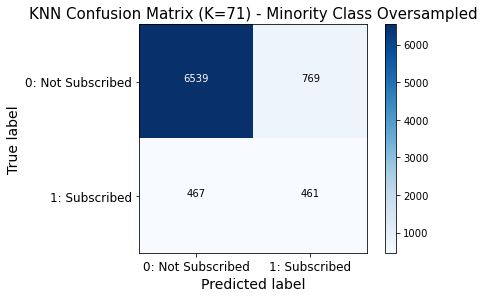

In [166]:
knn_cm_smote = confusion_matrix(y_test, knn_pred_smote, labels=[0,1])
plot_confusion_matrix(knn_cm_smote, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=71) - Minority Class Oversampled')

In [167]:
print('KNN: Classification Report (K=71) - Minority Class oversampled')
print(classification_report(y_test, knn_pred_smote, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=71) - Minority Class oversampled
                precision    recall  f1-score   support

Not Subscribed       0.93      0.89      0.91      7308
    Subscribed       0.37      0.50      0.43       928

      accuracy                           0.85      8236
     macro avg       0.65      0.70      0.67      8236
  weighted avg       0.87      0.85      0.86      8236



In [168]:
print('ROC Area Under the Curve - Original DS: ', round(roc_auc_score(y_test, knn_probs[:,1]),2))
print('ROC Area Under the Curve - Undersampled DS: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))
print('ROC Area Under the Curve - Oversampled DS: ', round(roc_auc_score(y_test, knn_probs_smote[:,1]),2))

ROC Area Under the Curve - Original DS:  0.75
ROC Area Under the Curve - Undersampled DS:  0.77
ROC Area Under the Curve - Oversampled DS:  0.71


In [169]:
precision_smote, recall_smote, thresholds_pr_smote = precision_recall_curve(y_test, knn_probs_smote[:,1])
print('Precision/Recall Area Under the Curve - Original DS: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Undersampled DS: ', round(auc(recall_enn, precision_enn),2))
print('Precision/Recall Area Under the Curve - Oversampled DS: ', round(auc(recall_smote, precision_smote),2))

Precision/Recall Area Under the Curve - Original DS:  0.41
Precision/Recall Area Under the Curve - Undersampled DS:  0.45
Precision/Recall Area Under the Curve - Oversampled DS:  0.34


Oversampling the minority class didn't make a better classifier: all relevant metrics are less than the up-to-now-best-classifier (DS Undersampled with threshold at 0.54).  
Let's plot ROC and Precision/Recall curves to look further into the results.

In [170]:
fpr_smote, tpr_smote, thresholds_roc_smote = roc_curve(y_test, knn_probs_smote[:,1])
j_stat_smote = []
for t in range(thresholds_roc_smote.shape[0]):
    j_stat_smote.append(tpr_smote[t] - fpr_smote[t])

best_j_idx_smote = j_stat_smote.index(max(j_stat_smote))
print("Oversampled Dataset - Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc_smote[best_j_idx_smote],
                                                                                   max(j_stat_smote)))

Oversampled Dataset - Best threshold: 0.4572174968994295 . Youden's J statistic: 0.4070197044334975


In [171]:
f1_smote = []
for t in range(thresholds_pr_smote.shape[0]):
    f1_smote.append(2 * (precision_smote[t]*recall_smote[t]) / (precision_smote[t]+recall_smote[t]))

best_f1_idx_smote = f1_smote.index(max(f1_smote))
print("Oversampled Dataset - Best threshold: {} . F-1 Score: {}".format(thresholds_pr_smote[best_f1_idx_smote], max(f1_smote)))

Oversampled Dataset - Best threshold: 0.6453589680282145 . F-1 Score: 0.43619725470259274


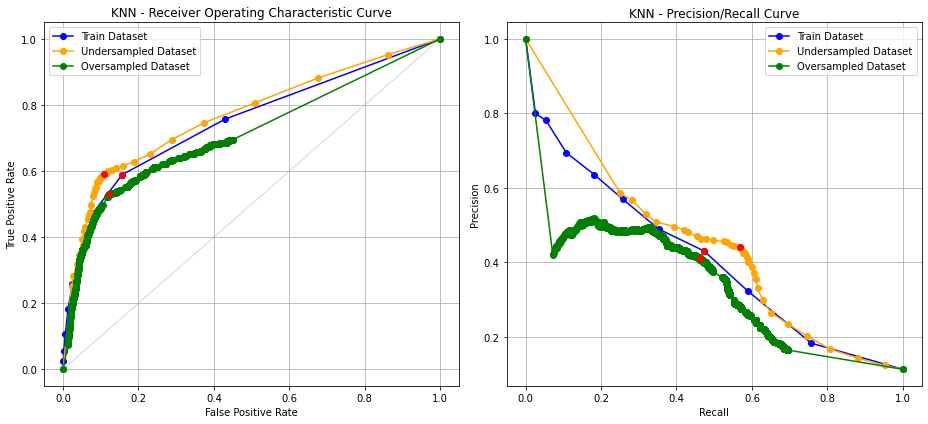

In [172]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr, tpr, marker='o', color='blue', label='Train Dataset')
ax1.plot(fpr_enn, tpr_enn, marker='o', color='orange', label='Undersampled Dataset')
ax1.plot(fpr_smote, tpr_smote, marker='o', color='green', label='Oversampled Dataset')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr[best_j_idx], tpr[best_j_idx], marker='o', color='red')
ax1.plot(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn], marker='o', color='red')
ax1.plot(fpr_smote[best_j_idx_smote], tpr_smote[best_j_idx_smote], marker='o', color='red')
ax1.set(title='KNN - Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.legend()

ax2 = ax_list[1]
ax2.plot(recall, precision, marker='o', color='blue', label='Train Dataset')
ax2.plot(recall_enn, precision_enn, marker='o', color='orange', label='Undersampled Dataset')
ax2.plot(recall_smote, precision_smote, marker='o', color='green', label='Oversampled Dataset')
ax2.plot(recall[best_f1_idx], precision[best_f1_idx], marker='o', color='red')
ax2.plot(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn], marker='o', color='red')
ax2.plot(recall_smote[best_f1_idx_smote], precision_smote[best_f1_idx_smote], marker='o', color='red')
ax2.set(title='KNN - Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)
ax2.legend()

plt.tight_layout()

To change the probability threshold for the oversampled DS won't bring any better result: the up-to-now-best-classifier will still perform better since all thresholds for the oversampled DS are further away from an ideal perfect model than the up-to-now-best-classifier.

In [173]:
# let's store the result
headers = ['Precision - Positive Class', 'Recall - Positive Class', 'F1_Score - Positive Class',
           'Accuracy', 'F1_Score - macro avg']
smote_idx = ['DS Oversampled']
metrics_smote = [round(precision_score(y_test, knn_pred_smote),2),
                 round(recall_score(y_test, knn_pred_smote),2),
                 round(f1_score(y_test, knn_pred_smote),2),
                 round(accuracy_score(y_test, knn_pred_smote),2),
                 round(f1_score(y_test, knn_pred_smote, average = 'macro'),2)]

knn_report_table_smote = pd.DataFrame(data=[metrics_smote], index=smote_idx, columns=headers)
knn_report_table = pd.concat([knn_report_table, knn_report_table_smote], axis=0)
knn_report_table

Precision - Positive Class  \
Threshold (TH): 0.5 (default)                             0.57   
Threshold (TH): 0.22                                      0.32   
Threshold(TH): 0.33                                       0.43   
DS Undersampled (default TH (0.5))                        0.44   
DS Undersampled (TH: 0.35)                                0.41   
DS Undersampled (TH: 0.54)                                0.44   
DS Oversampled                                            0.37   

                                    Recall - Positive Class  \
Threshold (TH): 0.5 (default)                          0.26   
Threshold (TH): 0.22                                   0.59   
Threshold(TH): 0.33                                    0.47   
DS Undersampled (default TH (0.5))                     0.57   
DS Undersampled (TH: 0.35)                             0.59   
DS Undersampled (TH: 0.54)                             0.57   
DS Oversampled                                         0.50   

                                    F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                            0.36      0.89   
Threshold (TH): 0.22                                     0.42      0.81   
Threshold(TH): 0.33                                      0.45      0.87   
DS Undersampled (default TH (0.5))                       0.49      0.87   
DS Undersampled (TH: 0.35)                               0.48      0.86   
DS Undersampled (TH: 0.54)                               0.50      0.87   
DS Oversampled                                           0.43      0.85   

                                    F1_Score - macro avg  
Threshold (TH): 0.5 (default)                       0.65  
Threshold (TH): 0.22                                0.65  
Threshold(TH): 0.33                                 0.69  
DS Undersampled (default TH (0.5))                  0.71  
DS Undersampled (TH: 0.35)                          0.70  
DS Undersampled (TH: 0.54)                          0.71  
DS Oversampled                                      0.67

##### Resampling : Edited Nearest Neighbors + SMOTE (Synthetic Minority Oversampling Technique)

I want to try with a last sampling technique: Resampling, that is combining undersampling (Edited Nearest Neighbours) with oversampling (SMOTE). Oversampling with SMOTE didn't produce better results compared to undersampling, so this time I'll undersample with ENN and add on top of that SMOTE oversampling , using a different minority-to-majority ratio instead of the default one (0.2 instead of 0.5).

```python
# import the Pipeline class from imblearn
from imblearn.pipeline import Pipeline
# create ENN object using the best hyperparameters
enn = EditedNearestNeighbours(n_neighbors=6)
# create SMOTENC object with a sampling strayegy of 0.2 (ratio of minority to majority class = 20%)
smote_nc_1 = SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18], random_state=0, sampling_strategy=0.20)
# create a pipeline with min-max scaler, ENN undersampling, SMOTENC oversampling, and K-Nearest Neighbors classifier
knn_pipe_res = Pipeline([('minmax_scaler', MinMaxScaler()), ('enn_method', enn), ('smotenc_method', smote_nc_1),
                         ('knn_classifier', KNeighborsClassifier())])
# Hyperparameters grid
h_params = {'knn_classifier__n_neighbors': [31, 33, 35, 37, 39, 41],
            'knn_classifier__weights': ['uniform', 'distance'],
            'knn_classifier__p': [1, 2]} # p=1 manhattan_distance; p=2 euclidean_distance
# Create a grid search CV model
knn_grid_res = GridSearchCV(knn_pipe_res, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
knn_grid_res.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('enn_method', EditedNearestNeighbours(n_neighbors=6)),
                                       ('smotenc_method', SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18],
                                                                  random_state=0, sampling_strategy=0.2)),
                                       ('knn_classifier', KNeighborsClassifier())]),
             param_grid={'knn_classifier__n_neighbors': [31, 33, 35, 37, 39, 41],
                         'knn_classifier__p': [1, 2],
                         'knn_classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./knn_grid_res.p', 'wb') as f:
    pickle.dump(knn_grid_res, f)

f.close()
```

In [174]:
# load the the Grid Search CV object
with open('./knn_grid_res.p', 'rb') as f:
    knn_grid_res = pickle.load(f)
    
f.close()
knn_grid_res

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('enn_method',
                                        EditedNearestNeighbours(n_neighbors=6)),
                                       ('smotenc_method',
                                        SMOTENC(categorical_features=[8, 9, 10,
                                                                      11, 12,
                                                                      13, 14,
                                                                      15, 16,
                                                                      17, 18],
                                                random_state=0,
                                                sampling_strategy=0.2)),
                                       ('knn_classifier',
                                        KNeighborsClassifier())]),
 

In [175]:
# Check the best hyperparameters
knn_grid_res.best_params_

{'knn_classifier__n_neighbors': 37,
 'knn_classifier__p': 1,
 'knn_classifier__weights': 'uniform'}

The optimum hyperparameters are:
* Number of Neighbors (K): 37.
* Type of Distance: Manhatthan Distance (L1).
* Weights of Neighbors: Uniform

In [177]:
# let's check the size of the resampling
smote_nc_1 = SMOTENC(categorical_features=[8,9,10,11,12,13,14,15,16,17,18], random_state=0, sampling_strategy=0.20)
x_enn, y_enn = enn.fit_resample(x_train_scld, y_train)
x_res, y_res = smote_nc_1.fit_resample(x_enn, y_enn)
x_res.shape, y_res.shape

((23911, 19), (23911,))

In [179]:
print('Number of observations before resampling:', y_train.shape[0])
print('Number of removed observations:', y_train.shape[0] - y_enn.shape[0])
print('Number of synthetic samples (minority class):', abs(y_res.shape[0] - y_enn.shape[0]))
print('Number of observations after resampling:', y_res.shape[0])
print('Original dataset and resampled dataset delta: ', abs(y_res.shape[0] - y_train.shape[0]))

Number of observations before resampling: 32940
Number of removed observations: 9303
Number of synthetic samples (minority class): 274
Number of observations after resampling: 23911
Original dataset and resampled dataset delta:  9029


In [180]:
# Check the class imbalance
y_res.value_counts(normalize=True)

0    0.83334
1    0.16666
Name: subscribed, dtype: float64

In [181]:
# Chech the number of observations per class
y_res.value_counts()

0    19926
1     3985
Name: subscribed, dtype: int64

In [182]:
# store the best estimator
knn_model_res = knn_grid_res.best_estimator_
knn_model_res

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('enn_method', EditedNearestNeighbours(n_neighbors=6)),
                ('smotenc_method',
                 SMOTENC(categorical_features=[8, 9, 10, 11, 12, 13, 14, 15, 16,
                                               17, 18],
                         random_state=0, sampling_strategy=0.2)),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=37, p=1))])

In [183]:
# Outputs predictions with best estimator
knn_pred_res = knn_model_res.predict(x_test)
knn_probs_res = knn_model_res.predict_proba(x_test)
knn_pred_res.shape, knn_probs_res.shape

((8236,), (8236, 2))

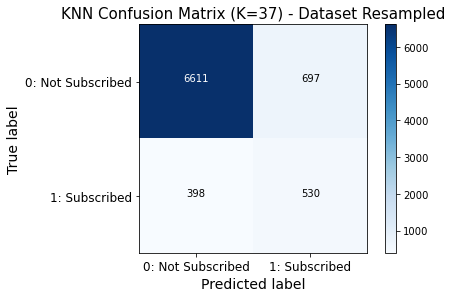

In [184]:
knn_cm_res = confusion_matrix(y_test, knn_pred_res, labels=[0,1])
plot_confusion_matrix(knn_cm_res, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37) - Dataset Resampled')

In [185]:
print('KNN: Classification Report (K=37) - Dataset resampled')
print(classification_report(y_test, knn_pred_res, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=37) - Dataset resampled
                precision    recall  f1-score   support

Not Subscribed       0.94      0.90      0.92      7308
    Subscribed       0.43      0.57      0.49       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.87      8236



In [186]:
knn_report_table

Precision - Positive Class  \
Threshold (TH): 0.5 (default)                             0.57   
Threshold (TH): 0.22                                      0.32   
Threshold(TH): 0.33                                       0.43   
DS Undersampled (default TH (0.5))                        0.44   
DS Undersampled (TH: 0.35)                                0.41   
DS Undersampled (TH: 0.54)                                0.44   
DS Oversampled                                            0.37   

                                    Recall - Positive Class  \
Threshold (TH): 0.5 (default)                          0.26   
Threshold (TH): 0.22                                   0.59   
Threshold(TH): 0.33                                    0.47   
DS Undersampled (default TH (0.5))                     0.57   
DS Undersampled (TH: 0.35)                             0.59   
DS Undersampled (TH: 0.54)                             0.57   
DS Oversampled                                         0.50   

                                    F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                            0.36      0.89   
Threshold (TH): 0.22                                     0.42      0.81   
Threshold(TH): 0.33                                      0.45      0.87   
DS Undersampled (default TH (0.5))                       0.49      0.87   
DS Undersampled (TH: 0.35)                               0.48      0.86   
DS Undersampled (TH: 0.54)                               0.50      0.87   
DS Oversampled                                           0.43      0.85   

                                    F1_Score - macro avg  
Threshold (TH): 0.5 (default)                       0.65  
Threshold (TH): 0.22                                0.65  
Threshold(TH): 0.33                                 0.69  
DS Undersampled (default TH (0.5))                  0.71  
DS Undersampled (TH: 0.35)                          0.70  
DS Undersampled (TH: 0.54)                          0.71  
DS Oversampled                                      0.67

In [187]:
print('ROC Area Under the Curve - Original DS: ', round(roc_auc_score(y_test, knn_probs[:,1]),2))
print('ROC Area Under the Curve - Undersampled DS: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))
print('ROC Area Under the Curve - Oversampled DS: ', round(roc_auc_score(y_test, knn_probs_smote[:,1]),2))
print('ROC Area Under the Curve - Resampled DS: ', round(roc_auc_score(y_test, knn_probs_res[:,1]),2))

ROC Area Under the Curve - Original DS:  0.75
ROC Area Under the Curve - Undersampled DS:  0.77
ROC Area Under the Curve - Oversampled DS:  0.71
ROC Area Under the Curve - Resampled DS:  0.77


In [188]:
precision_res, recall_res, thresholds_pr_res = precision_recall_curve(y_test, knn_probs_res[:,1])
print('Precision/Recall Area Under the Curve - Original DS: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Undersampled DS: ', round(auc(recall_enn, precision_enn),2))
print('Precision/Recall Area Under the Curve - Oversampled DS: ', round(auc(recall_smote, precision_smote),2))
print('Precision/Recall Area Under the Curve - Resampled DS: ', round(auc(recall_res, precision_res),2))

Precision/Recall Area Under the Curve - Original DS:  0.41
Precision/Recall Area Under the Curve - Undersampled DS:  0.45
Precision/Recall Area Under the Curve - Oversampled DS:  0.34
Precision/Recall Area Under the Curve - Resampled DS:  0.45


Resampling the dataset makes the same performance as undersampling. Let's plot ROC and Precision/Recall curves to look further into the results.

In [189]:
fpr_res, tpr_res, thresholds_roc_res = roc_curve(y_test, knn_probs_res[:,1])
j_stat_res = []
for t in range(thresholds_roc_res.shape[0]):
    j_stat_res.append(tpr_res[t] - fpr_res[t])

best_j_idx_res = j_stat_res.index(max(j_stat_res))
print("Resampled Dataset - Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc_res[best_j_idx_res],
                                                                                 max(j_stat_res)))

Resampled Dataset - Best threshold: 0.4864864864864865 . Youden's J statistic: 0.4807231800766283


In [190]:
f1_res = []
for t in range(thresholds_pr_res.shape[0]):
    f1_res.append(2 * (precision_res[t]*recall_res[t]) / (precision_res[t]+recall_res[t]))

best_f1_idx_res = f1_res.index(max(f1_res))
print("Resampled Dataset - Best threshold: {} . F-1 Score: {}".format(thresholds_pr_res[best_f1_idx_res], max(f1_res)))

Resampled Dataset - Best threshold: 0.5675675675675675 . F-1 Score: 0.49647390691114246


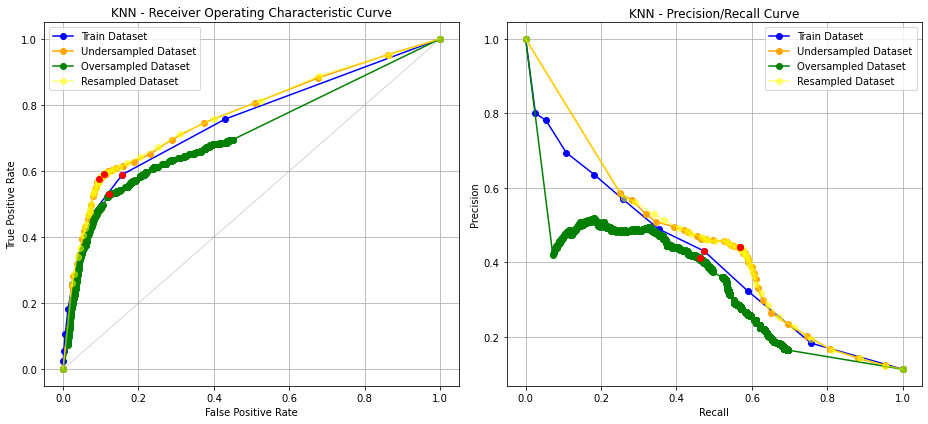

In [191]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr, tpr, marker='o', color='blue', label='Train Dataset')
ax1.plot(fpr_enn, tpr_enn, marker='o', color='orange', label='Undersampled Dataset')
ax1.plot(fpr_smote, tpr_smote, marker='o', color='green', label='Oversampled Dataset')
ax1.plot(fpr_res, tpr_res, marker='o', color='yellow', alpha=0.5, label='Resampled Dataset')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr[best_j_idx], tpr[best_j_idx], marker='o', color='red')
ax1.plot(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn], marker='o', color='red')
ax1.plot(fpr_smote[best_j_idx_smote], tpr_smote[best_j_idx_smote], marker='o', color='red')
ax1.plot(fpr_res[best_j_idx_res], tpr_res[best_j_idx_res], marker='o', color='red')
ax1.set(title='KNN - Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.legend()

ax2 = ax_list[1]
ax2.plot(recall, precision, marker='o', color='blue', label='Train Dataset')
ax2.plot(recall_enn, precision_enn, marker='o', color='orange', label='Undersampled Dataset')
ax2.plot(recall_smote, precision_smote, marker='o', color='green', label='Oversampled Dataset')
ax2.plot(recall_res, precision_res, marker='o', color='yellow', alpha=0.5, label='Resampled Dataset')
ax2.plot(recall[best_f1_idx], precision[best_f1_idx], marker='o', color='red')
ax2.plot(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn], marker='o', color='red')
ax2.plot(recall_smote[best_f1_idx_smote], precision_smote[best_f1_idx_smote], marker='o', color='red')
ax2.plot(recall_res[best_f1_idx_res], precision_res[best_f1_idx_res], marker='o', color='red')
ax2.set(title='KNN - Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)
ax2.legend()

plt.tight_layout()

Let's change the probability threshold and compare the performance metrics.

In [192]:
# set threwshold at 0.49 and make new predictions
knn_preds_newtrs_1_res = ((knn_model_res.predict_proba(x_test)[:,1]
                           >= thresholds_roc_res[best_j_idx_res]).astype(bool)).astype(int)
knn_preds_newtrs_1_res

array([0, 1, 0, ..., 0, 0, 0])

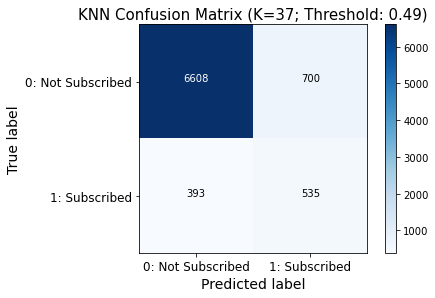

In [193]:
knn_cm_newtrs_1_res = confusion_matrix(y_test, knn_preds_newtrs_1_res, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_1_res, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37; Threshold: 0.49)')

In [194]:
print('KNN: Classification Report (K=37; Threshold: 0.49)')
print(classification_report(y_test, knn_preds_newtrs_1_res, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=37; Threshold: 0.49)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.90      0.92      7308
    Subscribed       0.43      0.58      0.49       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [195]:
# set threwshold at 0.57 and make new predictions
knn_preds_newtrs_2_res = ((knn_model_res.predict_proba(x_test)[:,1]
                           >= thresholds_pr_res[best_f1_idx_res]).astype(bool)).astype(int)
knn_preds_newtrs_2_res.shape

(8236,)

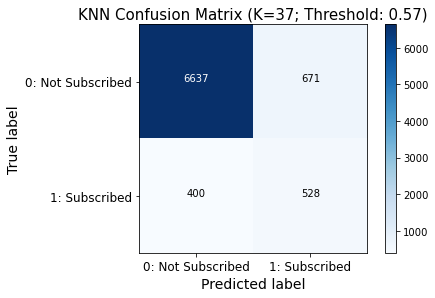

In [196]:
knn_cm_newtrs_2_res = confusion_matrix(y_test, knn_preds_newtrs_2_res, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_2_res, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37; Threshold: 0.57)')

In [197]:
print('KNN: Classification Report (K=37; Threshold: 0.57)')
print(classification_report(y_test, knn_preds_newtrs_2_res, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

KNN: Classification Report (K=37; Threshold: 0.57)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.93      7308
    Subscribed       0.44      0.57      0.50       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [198]:
# let's store the result
headers = ['Precision - Positive Class', 'Recall - Positive Class', 'F1_Score - Positive Class',
           'Accuracy', 'F1_Score - macro avg']
table_res_idx = ['DS Resampled (default TH (0.5))', 'DS Resampled (TH: 0.49)', 'DS Resampled (TH: 0.57)']
metrics_1_res = [round(precision_score(y_test, knn_pred_res),2),
                 round(recall_score(y_test, knn_pred_res),2),
                 round(f1_score(y_test, knn_pred_res),2),
                 round(accuracy_score(y_test, knn_pred_res),2),
                 round(f1_score(y_test, knn_pred_res, average = 'macro'),2)]
metrics_2_res = [round(precision_score(y_test, knn_preds_newtrs_1_res),2),
                 round(recall_score(y_test, knn_preds_newtrs_1_res),2),
                 round(f1_score(y_test, knn_preds_newtrs_1_res),2),
                 round(accuracy_score(y_test, knn_preds_newtrs_1_res),2),
                 round(f1_score(y_test, knn_preds_newtrs_1_res, average = 'macro'),2)]
metrics_3_res = [round(precision_score(y_test, knn_preds_newtrs_2_res),2),
                 round(recall_score(y_test, knn_preds_newtrs_2_res),2),
                 round(f1_score(y_test, knn_preds_newtrs_2_res),2),
                 round(accuracy_score(y_test, knn_preds_newtrs_2_res),2),
                 round(f1_score(y_test, knn_preds_newtrs_2_res, average = 'macro'),2)]

knn_report_table_res = pd.DataFrame(data=[metrics_1_res, metrics_2_res, metrics_3_res], index=table_res_idx, columns=headers)
knn_report_table = pd.concat([knn_report_table, knn_report_table_res], axis=0)
knn_report_table

Precision - Positive Class  \
Threshold (TH): 0.5 (default)                             0.57   
Threshold (TH): 0.22                                      0.32   
Threshold(TH): 0.33                                       0.43   
DS Undersampled (default TH (0.5))                        0.44   
DS Undersampled (TH: 0.35)                                0.41   
DS Undersampled (TH: 0.54)                                0.44   
DS Oversampled                                            0.37   
DS Resampled (default TH (0.5))                           0.43   
DS Resampled (TH: 0.49)                                   0.43   
DS Resampled (TH: 0.57)                                   0.44   

                                    Recall - Positive Class  \
Threshold (TH): 0.5 (default)                          0.26   
Threshold (TH): 0.22                                   0.59   
Threshold(TH): 0.33                                    0.47   
DS Undersampled (default TH (0.5))                     0.57   
DS Undersampled (TH: 0.35)                             0.59   
DS Undersampled (TH: 0.54)                             0.57   
DS Oversampled                                         0.50   
DS Resampled (default TH (0.5))                        0.57   
DS Resampled (TH: 0.49)                                0.58   
DS Resampled (TH: 0.57)                                0.57   

                                    F1_Score - Positive Class  Accuracy  \
Threshold (TH): 0.5 (default)                            0.36      0.89   
Threshold (TH): 0.22                                     0.42      0.81   
Threshold(TH): 0.33                                      0.45      0.87   
DS Undersampled (default TH (0.5))                       0.49      0.87   
DS Undersampled (TH: 0.35)                               0.48      0.86   
DS Undersampled (TH: 0.54)                               0.50      0.87   
DS Oversampled                                           0.43      0.85   
DS Resampled (default TH (0.5))                          0.49      0.87   
DS Resampled (TH: 0.49)                                  0.49      0.87   
DS Resampled (TH: 0.57)                                  0.50      0.87   

                                    F1_Score - macro avg  
Threshold (TH): 0.5 (default)                       0.65  
Threshold (TH): 0.22                                0.65  
Threshold(TH): 0.33                                 0.69  
DS Undersampled (default TH (0.5))                  0.71  
DS Undersampled (TH: 0.35)                          0.70  
DS Undersampled (TH: 0.54)                          0.71  
DS Oversampled                                      0.67  
DS Resampled (default TH (0.5))                     0.71  
DS Resampled (TH: 0.49)                             0.71  
DS Resampled (TH: 0.57)                             0.71

In [382]:
knn_report_table[knn_report_table['F1_Score - macro avg'] == 0.71]

Precision - Positive Class  \
DS Undersampled (default TH (0.5))                        0.44   
DS Undersampled (TH: 0.54)                                0.44   
DS Resampled (default TH (0.5))                           0.43   
DS Resampled (TH: 0.49)                                   0.43   
DS Resampled (TH: 0.57)                                   0.44   

                                    Recall - Positive Class  \
DS Undersampled (default TH (0.5))                     0.57   
DS Undersampled (TH: 0.54)                             0.57   
DS Resampled (default TH (0.5))                        0.57   
DS Resampled (TH: 0.49)                                0.58   
DS Resampled (TH: 0.57)                                0.57   

                                    F1_Score - Positive Class  Accuracy  \
DS Undersampled (default TH (0.5))                       0.49      0.87   
DS Undersampled (TH: 0.54)                               0.50      0.87   
DS Resampled (default TH (0.5))                          0.49      0.87   
DS Resampled (TH: 0.49)                                  0.49      0.87   
DS Resampled (TH: 0.57)                                  0.50      0.87   

                                    F1_Score - macro avg  
DS Undersampled (default TH (0.5))                  0.71  
DS Undersampled (TH: 0.54)                          0.71  
DS Resampled (default TH (0.5))                     0.71  
DS Resampled (TH: 0.49)                             0.71  
DS Resampled (TH: 0.57)                             0.71

Resampling the dataset and moving the probability threshold make the same performance as undersampling.  
KNN Best Classifier is:
* Undersampling method - Edited Nearest Neighbors:
  * kind_sel: "all" (All neighbours will have to agree with the samples of interest to not be misscassified).
  * n_neighbors: 6.
* KNN Classifier:
  * Number of Neighbors (K): 37.
  * Type of Distance: Manhatthan Distance (L1).
  * Weights of Neighbors: uniform (all neighbors have same weight).
  * Probability Threshold: 0.54

In [199]:
knn_best = knn_model_enn # with threshold at 0.54
knn_best

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('enn_method', EditedNearestNeighbours(n_neighbors=6)),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=37, p=1))])

### 3.2. Classifier 2 - Random Forest <a name='randomforest'></a>

Again, Random Forest is a non-parametric model, therefore we don't need to make any assumptions on the data distribution, and data don't need any pre-processing transformations (no need to scale the data).  
I'll follow the same approach as per the KNN model:
* Fitting the model on the training set, using Grid_Search_CV method to find the best hyperparameters with stratified Cross Validation technique. Hyperparameters include:
  * Number of estimators/trees: 10, 50, 100, 250, 500
  * Criterion to measure the Information Gain: Gini or Entropy
  * Maximum depth of Decision Trees: 5, 15, 25, None
  * Class Weight: original weights, balanced weights (automatically adjust weights inversely proportional to class frequencies), balanced subsample (balanced weights are computed based on the bootstrap sample for every tree), customized weights: Class 0: 80%, Class 1: 20%, and Class 0: 70%, Class 1: 30%.
* Calculate following performance metrics using the test set to make predictions: confusion matrix, precision, recall, and F1 Scores, Receiver Operating Characteristic Curve, and ROC Area Under the Curve score.

```python
# create a Random Forest classifier object
randomforest_classifier = RandomForestClassifier(random_state=666)
# Hyperparameters grid
h_params = {'n_estimators': [10, 50, 100, 250, 500],
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 15, 25, None],
            'class_weight': [None, 'balanced', 'balanced_subsample', {0:0.8, 1:0.2}, {0:0.7, 1:0.3}]}
# Create a grid search CV model
rf_grid = GridSearchCV(randomforest_classifier, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
rf_grid.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),  
             estimator=RandomForestClassifier(random_state=666),  
             param_grid={'class_weight': [None, 'balanced', 'balanced_subsample', {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25, None],
                         'n_estimators': [10, 50, 100, 250, 500]},
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./rf_grid.p', 'wb') as f:
    pickle.dump(rf_grid, f)

f.close()
```

In [200]:
# load the Grid Search CV object
with open('./rf_grid.p', 'rb') as f:
    rf_grid = pickle.load(f)
    
f.close()
rf_grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(random_state=666),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample',
                                          {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25, None],
                         'n_estimators': [10, 50, 100, 250, 500]},
             scoring='f1', verbose=3)

In [201]:
# Check the best hyperparameters
rf_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'n_estimators': 10}

In [202]:
# store the best estimator
rf_model = rf_grid.best_estimator_
rf_model

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=666)

In [203]:
# Outputs predictions with best estimator
rf_pred = rf_model.predict(x_test)
rf_pred.shape

(8236,)

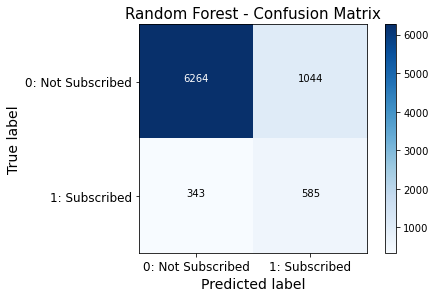

In [204]:
# Plot a Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels=[0,1])
plot_confusion_matrix(rf_cm, classes=['0: Not Subscribed', '1: Subscribed'], title='Random Forest - Confusion Matrix')

In [205]:
print('Random Forest: Classification Report')
print(classification_report(y_test, rf_pred, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))
rf_probs = rf_model.predict_proba(x_test)
print('ROC - Area Under the Curve: ', round(roc_auc_score(y_test, rf_probs[:,1]),2))

Random Forest: Classification Report
                precision    recall  f1-score   support

Not Subscribed       0.95      0.86      0.90      7308
    Subscribed       0.36      0.63      0.46       928

      accuracy                           0.83      8236
     macro avg       0.65      0.74      0.68      8236
  weighted avg       0.88      0.83      0.85      8236

ROC - Area Under the Curve:  0.79


In [206]:
print('ROC Area Under the Curve - KNN Best Classifier: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))
print('ROC Area Under the Curve - Random Forest: ', round(roc_auc_score(y_test, rf_probs[:,1]),2))

ROC Area Under the Curve - KNN Best Classifier:  0.77
ROC Area Under the Curve - Random Forest:  0.79


In [207]:
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, rf_probs[:,1])
print('Precision/Recall Area Under the Curve - KNN Best Classifier: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Random Forest: ', round(auc(recall_rf, precision_rf),2))

Precision/Recall Area Under the Curve - KNN Best Classifier:  0.41
Precision/Recall Area Under the Curve - Random Forest:  0.42


Let's look for the best probability threshold, plot ROC and precision/recall curves, and compare with the best KNN classifier.

In [208]:
fpr_rf, tpr_rf, thresholds_roc_rf = roc_curve(y_test, rf_probs[:,1])
j_stat_rf = []
for t in range(thresholds_roc_rf.shape[0]):
    j_stat_rf.append(tpr_rf[t] - fpr_rf[t])

best_j_idx_rf = j_stat_rf.index(max(j_stat_rf))
print("Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc_rf[best_j_idx_rf], max(j_stat_rf)))

Best threshold: 0.5472990213846068 . Youden's J statistic: 0.48903598795840175


In [209]:
f1_rf = []
for t in range(thresholds_pr_rf.shape[0]):
    f1_rf.append(2 * (precision_rf[t]*recall_rf[t]) / (precision_rf[t]+recall_rf[t]))

best_f1_idx_rf = f1_rf.index(max(f1_rf))
print("Best threshold: {} . F-1 Score: {}".format(thresholds_pr_rf[best_f1_idx_rf], max(f1_rf)))

Best threshold: 0.629461738848372 . F-1 Score: 0.4988235294117648


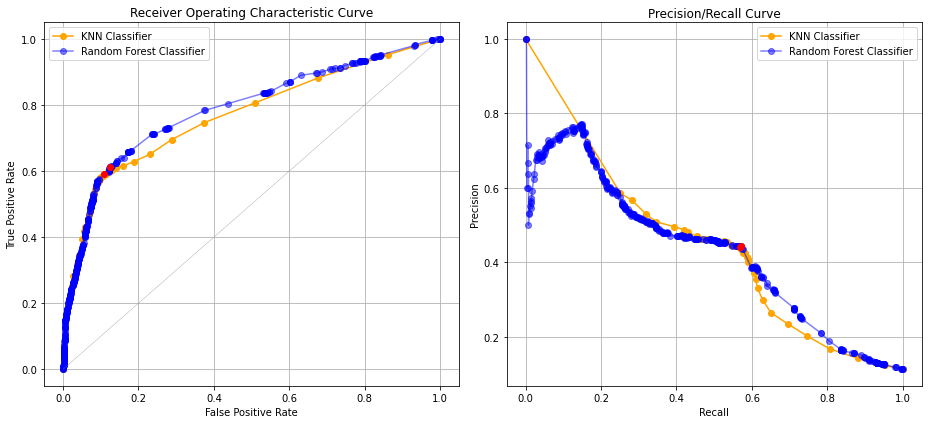

In [210]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr_enn, tpr_enn, marker='o', color='orange', label='KNN Classifier')
ax1.plot(fpr_rf, tpr_rf, marker='o', color='blue', alpha=0.5, label='Random Forest Classifier')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn], marker='o', color='red')
ax1.plot(fpr_rf[best_j_idx_rf], tpr_rf[best_j_idx_rf], marker='o', color='red')
ax1.set(title='Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.legend()

ax2 = ax_list[1]
ax2.plot(recall_enn, precision_enn, marker='o', color='orange', label='KNN Classifier')
ax2.plot(recall_rf, precision_rf, marker='o', color='blue', alpha=0.5, label='Random Forest Classifier')
ax2.plot(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn], marker='o', color='red')
ax2.plot(recall_rf[best_f1_idx_rf], precision_rf[best_f1_idx_rf], marker='o', color='red')
ax2.set(title='Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)
ax2.legend()

plt.tight_layout()

In [211]:
# set threwshold at 0.55 and make new predictions
rf_preds_newtrs_1 = ((rf_model.predict_proba(x_test)[:,1] >= thresholds_roc_rf[best_j_idx_rf]).astype(bool)).astype(int)
rf_preds_newtrs_1

array([0, 1, 0, ..., 0, 0, 0])

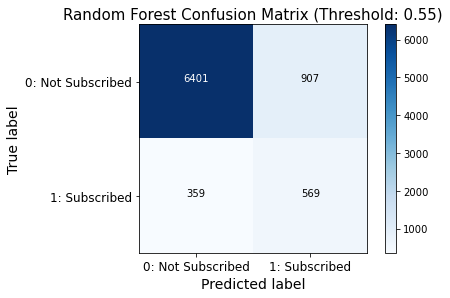

In [212]:
rf_cm_newtrs_1= confusion_matrix(y_test, rf_preds_newtrs_1, labels=[0,1])
plot_confusion_matrix(rf_cm_newtrs_1, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Random Forest Confusion Matrix (Threshold: 0.55)')

In [213]:
print('Random Forest: Classification Report (Threshold: 0.55)')
print(classification_report(y_test, rf_preds_newtrs_1, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

Random Forest: Classification Report (Threshold: 0.55)
                precision    recall  f1-score   support

Not Subscribed       0.95      0.88      0.91      7308
    Subscribed       0.39      0.61      0.47       928

      accuracy                           0.85      8236
     macro avg       0.67      0.74      0.69      8236
  weighted avg       0.88      0.85      0.86      8236



In [214]:
# set threwshold at 0.63 and make new predictions
rf_preds_newtrs_2 = ((rf_model.predict_proba(x_test)[:,1] >= thresholds_pr_rf[best_f1_idx_rf]).astype(bool)).astype(int)
rf_preds_newtrs_2.shape

(8236,)

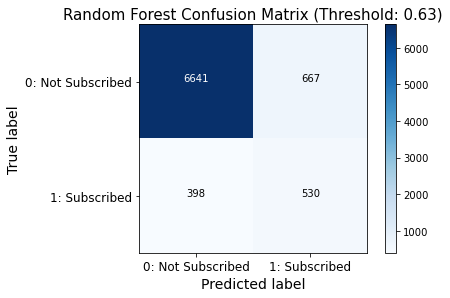

In [215]:
rf_cm_newtrs_2 = confusion_matrix(y_test, rf_preds_newtrs_2, labels=[0,1])
plot_confusion_matrix(rf_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Random Forest Confusion Matrix (Threshold: 0.63)')

In [216]:
print('Random Forest: Classification Report (Threshold: 0.63)')
print(classification_report(y_test, rf_preds_newtrs_2, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

Random Forest: Classification Report (Threshold: 0.63)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.93      7308
    Subscribed       0.44      0.57      0.50       928

      accuracy                           0.87      8236
     macro avg       0.69      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [217]:
headers = ['Precision - Positive Class', 'Recall - Positive Class', 'F1_Score - Positive Class',
           'Accuracy', 'F1_Score - macro avg']
report_table_1 = pd.DataFrame(knn_report_table.loc['DS Undersampled (TH: 0.54)']).T
report_table_1 = report_table_1.rename(index={'DS Undersampled (TH: 0.54)': 'KNN - Best Classifier'})

rf_table_idx = ['Random Forest - TH: 0.5', 'Random Forest - TH: 0.55', 'Random Forest - TH: 0.63']
metrics_1 = [round(precision_score(y_test, rf_pred),2),
             round(recall_score(y_test, rf_pred),2),
             round(f1_score(y_test, rf_pred),2),
             round(accuracy_score(y_test, rf_pred),2),
             round(f1_score(y_test, rf_pred, average = 'macro'),2)]
metrics_2 = [round(precision_score(y_test, rf_preds_newtrs_1),2),
             round(recall_score(y_test, rf_preds_newtrs_1),2),
             round(f1_score(y_test, rf_preds_newtrs_1),2),
             round(accuracy_score(y_test, rf_preds_newtrs_1),2),
             round(f1_score(y_test, rf_preds_newtrs_1, average = 'macro'),2)]
metrics_3 = [round(precision_score(y_test, rf_preds_newtrs_2),2),
             round(recall_score(y_test, rf_preds_newtrs_2),2),
             round(f1_score(y_test, rf_preds_newtrs_2),2),
             round(accuracy_score(y_test, rf_preds_newtrs_2),2),
             round(f1_score(y_test, rf_preds_newtrs_2, average = 'macro'),2)]

rf_report_table = pd.DataFrame(data=[metrics_1, metrics_2, metrics_3], index=rf_table_idx, columns=headers)
report_table = pd.concat([report_table_1, rf_report_table])
print('Report Table')
report_table

Report Table


Precision - Positive Class  Recall - Positive Class  \
KNN - Best Classifier                           0.44                     0.57   
Random Forest - TH: 0.5                         0.36                     0.63   
Random Forest - TH: 0.55                        0.39                     0.61   
Random Forest - TH: 0.63                        0.44                     0.57   

                          F1_Score - Positive Class  Accuracy  \
KNN - Best Classifier                          0.50      0.87   
Random Forest - TH: 0.5                        0.46      0.83   
Random Forest - TH: 0.55                       0.47      0.85   
Random Forest - TH: 0.63                       0.50      0.87   

                          F1_Score - macro avg  
KNN - Best Classifier                     0.71  
Random Forest - TH: 0.5                   0.68  
Random Forest - TH: 0.55                  0.69  
Random Forest - TH: 0.63                  0.71

Random Forest best Classifier (probability threshold = 0.63) and KNN Best Classifier perform very similarly.

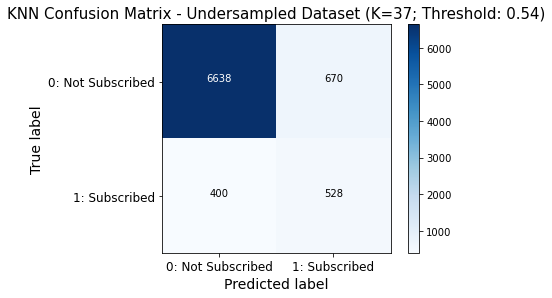

In [218]:
plot_confusion_matrix(knn_cm_newtrs_2_enn, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix - Undersampled Dataset (K=37; Threshold: 0.54)')

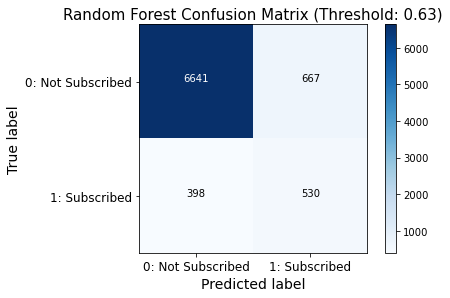

In [219]:
plot_confusion_matrix(rf_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Random Forest Confusion Matrix (Threshold: 0.63)')

In [220]:
rf_best = rf_model # with threshold at 0.63
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=666)

Random Forest best classifier hyperparameters:
* Number of estimators/trees: 10
* Criterion to measure the Information Gain: Gini
* Maximum depth of Decision Trees: 5
* Class Weight: balanced weights (automatically adjust weights inversely proportional to class frequencies)
* Probability Threshold: 0.63

### 3.3. Classifier 3 - Support Vector Machines <a name='svm'></a>

I'll build a third Classifier with Support Vector Machines algorithm, again, fitting the model on the training set, using Grid_Search_CV method to find the best hyperparameters with stratified Cross Validation technique. Hyperparameters include:
* Kernel: linear, radial basis function (rbf), polynomial
* C - regularization parameter: 1, 0.8, 0.5, 0.1, 0.01
* Class Weight: orginal weights, balanced weights (automatically adjust weights inversely proportional to class frequencies), customized weights: Class 0: 80%, Class 1: 20%, and Class 0: 70%, Class 1: 30%.
* Degree for polynomial kernel: 2, 3, 4, 5.

Eventually, I'll evaluate and compare SVM performance (confusion matrix, precision, recall, F1 Scores, Receiver Operating Characteristic and Precision/Recall Curves, and Area-Under-the-Curve scores) with the previously built models (K-Nearest Neighbours and Random Forest).

```python
# create a pipeline with min-max scaler and Support Vector Machines classifier 
svm_pipe = Pipeline([('minmax_scaler', MinMaxScaler()), ('svm_classifier', SVC())])
# Hyperparameters grid
h_params = [{'svm_classifier__kernel': ['linear', 'rbf'],
             'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
             'svm_classifier__class_weight': [None, 'balanced', {0:0.8, 1:0.2}, {0:0.7, 1:0.3}]},
            {'svm_classifier__kernel': ['poly'],
             'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
             'svm_classifier__degree': [2, 3, 4, 5],
             'svm_classifier__class_weight': [None, 'balanced', {0:0.8, 1:0.2}, {0:0.7, 1:0.3}]}]
# Create a grid search CV object
svm_grid = GridSearchCV(svm_pipe, h_params, cv=skf, scoring='f1', verbose=3)
# fit the model
svm_grid.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),  
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()), ('svm_classifier', SVC())]),
             param_grid=[{'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
                          'svm_classifier__class_weight': [None, 'balanced', {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}],
                          'svm_classifier__kernel': ['linear', 'rbf']},
                         {'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
                          'svm_classifier__class_weight': [None, 'balanced', {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}],
                          'svm_classifier__degree': [2, 3, 4, 5],
                          'svm_classifier__kernel': ['poly']}],
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./svm_grid.p', 'wb') as f:
    pickle.dump(svm_grid, f)

f.close()
```

In [224]:
# load the Grid Search CV object
with open('./svm_grid.p', 'rb') as f:
    svm_grid = pickle.load(f)
    
f.close()
svm_grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('svm_classifier', SVC())]),
             param_grid=[{'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
                          'svm_classifier__class_weight': [None, 'balanced',
                                                           {0: 0.8, 1: 0.2},
                                                           {0: 0.7, 1: 0.3}],
                          'svm_classifier__kernel': ['linear', 'rbf']},
                         {'svm_classifier__C': [1, 0.8, 0.5, 0.1, 0.01],
                          'svm_classifier__class_weight': [None, 'balanced',
                                                           {0: 0.8, 1: 0.2},
                                                           {0: 0.7, 1: 0.3}],
                          'svm_classifier__degree': [2, 3, 4, 5],
                          'svm_cl

In [225]:
# Check the best hyperparameters
svm_grid.best_params_

{'svm_classifier__C': 1,
 'svm_classifier__class_weight': 'balanced',
 'svm_classifier__kernel': 'rbf'}

In [226]:
# store the best estimator
svm_model = svm_grid.best_estimator_
svm_model

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('svm_classifier', SVC(C=1, class_weight='balanced'))])

In [227]:
# Outputs predictions with best estimator
svm_pred = svm_model.predict(x_test)
svm_pred.shape

(8236,)

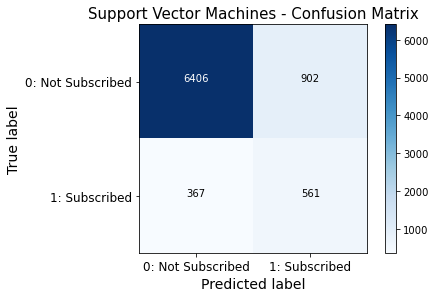

In [228]:
# Plot a Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred, labels=[0,1])
plot_confusion_matrix(svm_cm, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Support Vector Machines - Confusion Matrix')

In [229]:
print('Support Vector Machines: Classification Report')
print(classification_report(y_test, svm_pred, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))
print('ROC - Area Under the Curve: ', round(roc_auc_score(y_test, svm_pred),2))

Support Vector Machines: Classification Report
                precision    recall  f1-score   support

Not Subscribed       0.95      0.88      0.91      7308
    Subscribed       0.38      0.60      0.47       928

      accuracy                           0.85      8236
     macro avg       0.66      0.74      0.69      8236
  weighted avg       0.88      0.85      0.86      8236

ROC - Area Under the Curve:  0.74


In [230]:
print('ROC Area Under the Curve - KNN Best Classifier: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))
print('ROC Area Under the Curve - Random Forest Best Classifier: ', round(roc_auc_score(y_test, rf_probs[:,1]),2))
print('ROC Area Under the Curve - Support Vector Machines: ', round(roc_auc_score(y_test,svm_pred),2))

ROC Area Under the Curve - KNN Best Classifier:  0.77
ROC Area Under the Curve - Random Forest Best Classifier:  0.79
ROC Area Under the Curve - Support Vector Machines:  0.74


In [231]:
precision_svm, recall_svm, thresholds_pr_svm = precision_recall_curve(y_test, svm_pred)
print('Precision/Recall Area Under the Curve - KNN Best Classifier: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Random Forest Best Classifier: ', round(auc(recall_rf, precision_rf),2))
print('Precision/Recall Area Under the Curve - Support Vector machines: ', round(auc(recall_svm, precision_svm),2))

Precision/Recall Area Under the Curve - KNN Best Classifier:  0.41
Precision/Recall Area Under the Curve - Random Forest Best Classifier:  0.42
Precision/Recall Area Under the Curve - Support Vector machines:  0.52


In [270]:
rf_report_table_1 = pd.DataFrame(rf_report_table.loc['Random Forest - TH: 0.63']).T
rf_report_table_1 = rf_report_table_1.rename(index={'Random Forest - TH: 0.63': 'RF - Best Classifier'})

svm_table_idx = ['Support Vector Machines']
metrics_svm = [round(precision_score(y_test, svm_pred),2),
               round(recall_score(y_test, svm_pred),2),
               round(f1_score(y_test, svm_pred),2),
               round(accuracy_score(y_test, svm_pred),2),
               round(f1_score(y_test, svm_pred, average = 'macro'),2)]

svm_report_table = pd.DataFrame(data=[metrics_svm], index=svm_table_idx, columns=headers)
report_table = pd.concat([report_table_1, rf_report_table_1, svm_report_table])
print('Report Table')
report_table

Report Table


Precision - Positive Class  Recall - Positive Class  \
KNN - Best Classifier                          0.44                     0.57   
RF - Best Classifier                           0.44                     0.57   
Support Vector Machines                        0.38                     0.60   

                         F1_Score - Positive Class  Accuracy  \
KNN - Best Classifier                         0.50      0.87   
RF - Best Classifier                          0.50      0.87   
Support Vector Machines                       0.47      0.85   

                         F1_Score - macro avg  
KNN - Best Classifier                    0.71  
RF - Best Classifier                     0.71  
Support Vector Machines                  0.69

Support Vector Machines is able to catch more examples belonging to the minority class (Recall on the positive class is the greatest), but at cost of Precision: overall K-Nearest Neighbors and Random Forest, optimized with best hyperparameters and probability-thresholds, perform better, with greater F-1 scores and accuracy. Unfortunately, Support Vector Machine doesn't output probabilities, therefore it won't be possible moving the decision threshold to optimize the classifier.

Support Vector Machines best classifier hyperparameters:
* C - Regularization parameter: 1
* Class Weight: balanced weights (automatically adjust weights inversely proportional to class frequencies)
* Kernel (to map points to higher dimension): Radial Basis Function (rbf)

Support Vector Machines, as well as Random Forest, have hyperparameter "Class Weight", to balance classes for imbalanced datasets, so we don't need to try any down/up/resampling techniques since we can just set "Class Weight". For both Support Vector Machines and Random Forest "balanced weights" is the best setting for the "Class Weight" hyperparameter.

### 3.4. Classifier 4 - Ensemble Models: Stacking Classifier <a name='stacking'></a>

Let's have a look at KNN, RF, and SVM Confusion Matrices, with the default decision thresholds, and best hyperparameters. 

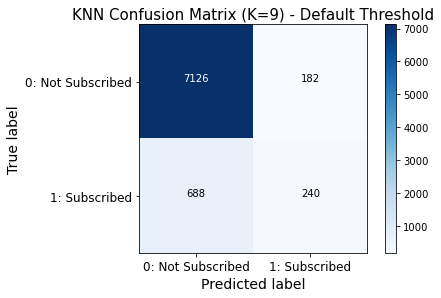

In [271]:
plot_confusion_matrix(knn_cm, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=9) - Default Threshold')

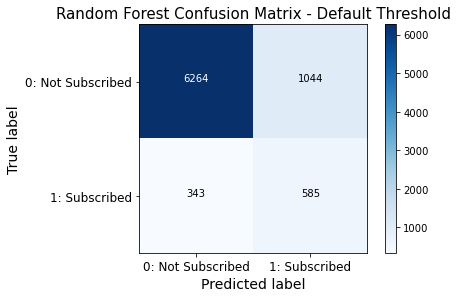

In [272]:
plot_confusion_matrix(rf_cm, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Random Forest Confusion Matrix - Default Threshold')

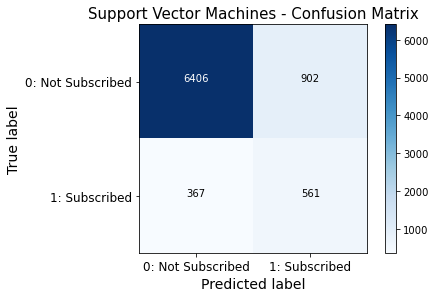

In [237]:
plot_confusion_matrix(svm_cm, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Support Vector Machines - Confusion Matrix')

Random Forest and Support Vector Machines perform quite similarly, although K-Nearest Neighbors has a much higher precision, but a much lower recall as well.  
As per last Classifier, I want to stack the 3 Classifiers (KNN, Random Forest, and SVM) with the already found best hyperparameters (base estimators), and train a meta-classifier (final estimator) using the outputs of the base estimators as inputs for the final estimator: this is an Ensemble Model called "Stacking".

```python
from sklearn.pipeline import Pipeline
# Create a list of the base estimators, with the already found best hyperparameters
estimators = [('knn', KNeighborsClassifier(n_neighbors=9, p=1)),
              ('rf', RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10, random_state=666)),
              ('svm', SVC(C=1, class_weight='balanced'))]
# Create a list of the meta final estimators to be tested
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
meta_classifiers = [lr, dt]

# Hyperparameters grid
h_params_1 = [{'stacking_classifier__final_estimator': [lr],
               'stacking_classifier__final_estimator__penalty': ['l2', 'none'],
               'stacking_classifier__final_estimator__C': [1.0, 0.5, 0.1],
               'stacking_classifier__final_estimator__class_weight': [None, 'balanced']},
              {'stacking_classifier__final_estimator': [dt],
               'stacking_classifier__final_estimator__criterion': ['gini','entropy'],
               'stacking_classifier__final_estimator__max_depth': [None, 2],
               'stacking_classifier__final_estimator__class_weight': [None, 'balanced']}]
# Create a pipeline with stacking classifier and Min Max Scaler
sc_1 = StackingClassifier(estimators, verbose=3)
stack_pipe = Pipeline([('minmax_scaler', MinMaxScaler()), ('stacking_classifier', sc_1)])
# Create a grid search CV object
stack_grid_1 = GridSearchCV(stack_pipe, h_params_1, cv=skf, scoring='f1', verbose=3)
# fit the model
stack_grid_1.fit(x_train, y_train)
```

```python
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                                       ('stacking_classifier',
                                        StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=9, p=1)),
                                                                       ('rf', RandomForestClassifier(class_weight='balanced',
                                                                                                     max_depth=5,
                                                                                                     n_estimators=10,
                                                                                                     random_state=666)),
                                                                       ('svm', SVC(C=1,...
                          'stacking_classifier__final_estimator__penalty': ['l2', 'none']},
                         {'stacking_classifier__final_estimator': [DecisionTreeClassifier(random_state=0)],
                          'stacking_classifier__final_estimator__class_weight': [None, 'balanced'],
                          'stacking_classifier__final_estimator__criterion': ['gini', 'entropy'],
                          'stacking_classifier__final_estimator__max_depth': [None, 2]}],
             scoring='f1', verbose=3)
```

```python
# Save the Grid Search CV object as a pickle file
with open(r'./stack_grid.p', 'wb') as f:
    pickle.dump(stack_grid_1, f)

f.close()
```

In [336]:
# load the the Grid Search CV object
with open('./stack_grid.p', 'rb') as f:
    stack_grid = pickle.load(f)
    
f.close()

In [337]:
# Check the best hyperparameters
stack_grid.best_params_

{'stacking_classifier__final_estimator': LogisticRegression(C=0.1, class_weight='balanced', random_state=0),
 'stacking_classifier__final_estimator__C': 0.1,
 'stacking_classifier__final_estimator__class_weight': 'balanced',
 'stacking_classifier__final_estimator__penalty': 'l2'}

The final-estimator best hyperparameters are:
* meta-classifier: Logistic Regression
* C - Regularization Parameter: 0.1.
* Class weight: balanced
* penalty: L2 penalty.

In [338]:
# store the best estimator
stack_model = stack_grid.best_estimator_
stack_model

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('stacking_classifier',
                 StackingClassifier(estimators=[('knn',
                                                 KNeighborsClassifier(n_neighbors=9,
                                                                      p=1)),
                                                ('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=5,
                                                                        n_estimators=10,
                                                                        random_state=666)),
                                                ('svm',
                                                 SVC(C=1,
                                                     class_weight='balanced'))],
                                    final_estimator=LogisticRegression(C=0.1,


In [339]:
# Outputs predictions with best stack estimator
stack_pred = stack_model.predict(x_test)
stack_probs = stack_model.predict_proba(x_test)
stack_pred.shape

(8236,)

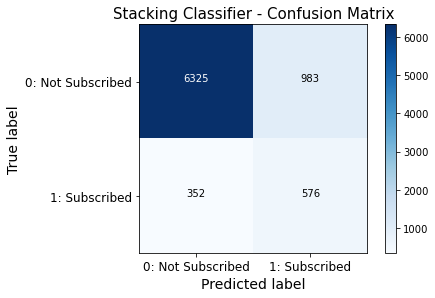

In [340]:
# Plot Stacking Classifier Confusion Matrix
stack_cm = confusion_matrix(y_test, stack_pred, labels=[0,1])
plot_confusion_matrix(stack_cm, classes=['0: Not Subscribed', '1: Subscribed'], title='Stacking Classifier - Confusion Matrix')

In [341]:
print('Stacking Classifier: Classification Report')
print(classification_report(y_test, stack_pred, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

Stacking Classifier: Classification Report
                precision    recall  f1-score   support

Not Subscribed       0.95      0.87      0.90      7308
    Subscribed       0.37      0.62      0.46       928

      accuracy                           0.84      8236
     macro avg       0.66      0.74      0.68      8236
  weighted avg       0.88      0.84      0.85      8236



Let's check the Area Under the Curves, and plot ROC and Precision/Recall curves to look further into the results.

In [385]:
print('ROC Area Under the Curve - KNN Best Classifier: ', round(roc_auc_score(y_test, knn_probs_enn[:,1]),2))
print('ROC Area Under the Curve - Random Forest Best Classifier: ', round(roc_auc_score(y_test, rf_probs[:,1]),2))
print('ROC Area Under the Curve - Support Vector Machines: ', round(roc_auc_score(y_test, svm_pred),2))
print('ROC Area Under the Curve - Stacking Classifier: ', round(roc_auc_score(y_test, stack_probs[:,1]),2))

ROC Area Under the Curve - KNN Best Classifier:  0.77
ROC Area Under the Curve - Random Forest Best Classifier:  0.79
ROC Area Under the Curve - Support Vector Machines:  0.74
ROC Area Under the Curve - Stacking Classifier:  0.79


In [384]:
precision_stack, recall_stack, thresholds_pr_stack = precision_recall_curve(y_test, stack_probs[:,1])
print('Precision/Recall Area Under the Curve - KNN Best Classifier: ', round(auc(recall, precision),2))
print('Precision/Recall Area Under the Curve - Random Forest Best Classifier: ', round(auc(recall_rf, precision_rf),2))
print('Precision/Recall Area Under the Curve - Support Vector machines: ', round(auc(recall_svm, precision_svm),2))
print('Precision/Recall Area Under the Curve - Stacking Classifier: ', round(auc(recall_stack, precision_stack),2))

Precision/Recall Area Under the Curve - KNN Best Classifier:  0.41
Precision/Recall Area Under the Curve - Random Forest Best Classifier:  0.42
Precision/Recall Area Under the Curve - Support Vector machines:  0.52
Precision/Recall Area Under the Curve - Stacking Classifier:  0.43


In [344]:
fpr_stack, tpr_stack, thresholds_roc_stack = roc_curve(y_test, stack_probs[:,1])
j_stat_stack = []
for t in range(thresholds_roc_stack.shape[0]):
    j_stat_stack.append(tpr_stack[t] - fpr_stack[t])

best_j_idx_stack = j_stat_stack.index(max(j_stat_stack))
print("Best threshold: {} . Youden's J statistic: {}".format(thresholds_roc_stack[best_j_idx_stack], max(j_stat_stack)))

Best threshold: 0.46824892984342237 . Youden's J statistic: 0.4884202244116037


In [345]:
f1_stack = []
for t in range(thresholds_pr_stack.shape[0]):
    f1_stack.append(2 * (precision_stack[t]*recall_stack[t]) / (precision_stack[t]+recall_stack[t]))

best_f1_idx_stack = f1_stack.index(max(f1_stack))
print("Best threshold: {} . F-1 Score: {}".format(thresholds_pr_stack[best_f1_idx_stack], max(f1_stack)))

Best threshold: 0.7153119838862827 . F-1 Score: 0.5011978917105894


<ipython-input-345-637a133d67b6>:3: RuntimeWarning: invalid value encountered in double_scalars
  f1_stack.append(2 * (precision_stack[t]*recall_stack[t]) / (precision_stack[t]+recall_stack[t]))


In [346]:
if max([max(j_stat_enn), max(j_stat_rf), max(j_stat_stack)]) in j_stat_enn:
    print('K-Nearest Neighbours is the model with the greatest Youden\'s J statistic.')
    print('Best probability threshold: ', thresholds_roc_enn[j_stat_enn.index(max(j_stat_enn))])
elif max([max(j_stat_enn), max(j_stat_rf), max(j_stat_stack)]) in j_stat_rf:
    print('Random Forest is the model with the greatest Youden\'s J statistic.')
    print('Best probability threshold: ', thresholds_roc_rf[j_stat_rf.index(max(j_stat_rf))])
else:
    print('Stacking Classifier is the model with the greatest Youden\'s J statistic.')
    print('Best probability threshold: ', thresholds_roc_stack[j_stat_stack.index(max(j_stat_stack))])

Random Forest is the model with the greatest Youden's J statistic.
Best probability threshold:  0.5472990213846068


In [347]:
if max([max(f1_enn), max(f1_rf), max(f1_stack)]) in f1_enn:
    print('K-Nearest Neighbours is the model with the greatest F1-Score.')
    print('Best probability threshold: ', thresholds_pr_enn[f1_enn.index(max(f1_enn))])
elif max([max(f1_enn), max(f1_rf), max(f1_stack)]) in f1_rf:
    print('Random Forest is the model with the greatest F1-Score.')
    print('Best probability threshold: ', thresholds_pr_rf[f1_rf.index(max(f1_rf))])
else:
    print('Stacking Classifier is the model with the greatest F1-Score.')
    print('Best probability threshold: ', thresholds_pr_stack[f1_stack.index(max(f1_stack))])

Stacking Classifier is the model with the greatest F1-Score.
Best probability threshold:  0.7153119838862827


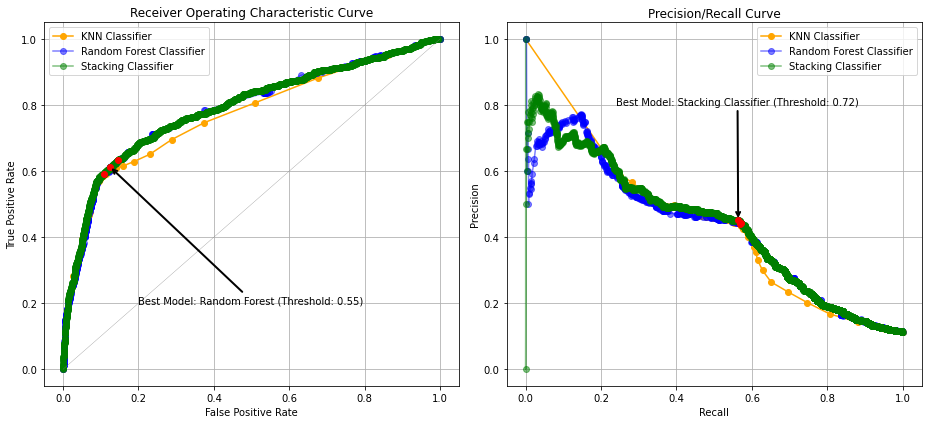

In [348]:
# plot ROC and Precision/Recall curves
fig, ax_list = plt.subplots(1, 2, figsize=(13,6))
ax1 = ax_list[0]
ax1.plot(fpr_enn, tpr_enn, marker='o', color='orange', label='KNN Classifier')
ax1.plot(fpr_rf, tpr_rf, marker='o', color='blue', alpha=0.5, label='Random Forest Classifier')
ax1.plot(fpr_stack, tpr_stack, marker='o', color='green', alpha=0.5, label='Stacking Classifier')
ax1.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='gray', lw=0.3)
ax1.plot(fpr_enn[best_j_idx_enn], tpr_enn[best_j_idx_enn], marker='o', color='red')
ax1.plot(fpr_rf[best_j_idx_rf], tpr_rf[best_j_idx_rf], marker='o', color='red')
ax1.plot(fpr_stack[best_j_idx_stack], tpr_stack[best_j_idx_stack], marker='o', color='red')
ax1.set(title='Receiver Operating Characteristic Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
ax1.grid(True)
ax1.legend()
ax1.annotate('Best Model: Random Forest (Threshold: 0.55)',
            xy=(fpr_rf[best_j_idx_rf], tpr_rf[best_j_idx_rf]),
            xytext=(0.2,0.2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax2 = ax_list[1]
ax2.plot(recall_enn, precision_enn, marker='o', color='orange', label='KNN Classifier')
ax2.plot(recall_rf, precision_rf, marker='o', color='blue', alpha=0.5, label='Random Forest Classifier')
ax2.plot(recall_stack, precision_stack, marker='o', color='green', alpha=0.5, label='Stacking Classifier')
ax2.plot(recall_enn[best_f1_idx_enn], precision_enn[best_f1_idx_enn], marker='o', color='red')
ax2.plot(recall_rf[best_f1_idx_rf], precision_rf[best_f1_idx_rf], marker='o', color='red')
ax2.plot(recall_stack[best_f1_idx_stack], precision_stack[best_f1_idx_stack], marker='o', color='red')
ax2.set(title='Precision/Recall Curve', xlabel='Recall', ylabel='Precision')
ax2.grid(True)
ax2.legend()
ax2.annotate('Best Model: Stacking Classifier (Threshold: 0.72)',
            xy=(recall_stack[best_f1_idx_stack], precision_stack[best_f1_idx_stack]),
            xytext=(0.24,0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.tight_layout()

It seems that the 3 classifiers perform very similarly:
* The AUC scores are pretty much the same (with KNN Classifier being the lowest performer). 
* The best decision thresholds seem to be very close to each other.

Although the difference between model's performances are not big:
* Random Forest with probability threshold at 0.55 is the model with the best trade off between True Positive Rate and False Positive Rate.
* Stacking Classifier with probability threshold at 0.72 is the model with the best trade off between Recall and Precision.

I will, now, compare the Confusion Matrix and the other relevant metrics: positive class recall, precision, F1-score, and model accuracy and F1-score.

In [349]:
# set threshold at 0.47 and make new predictions with stacking classifier
stack_preds_newtrs_1 = ((stack_model.predict_proba(x_test)[:,1]
                       >= thresholds_roc_stack[best_j_idx_stack]).astype(bool)).astype(int)
stack_preds_newtrs_1

array([0, 1, 0, ..., 0, 0, 0])

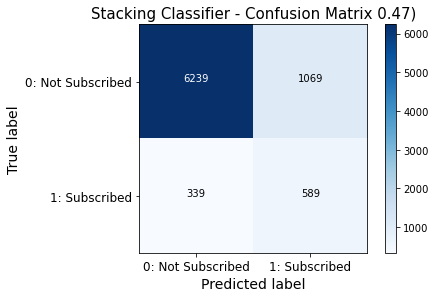

In [350]:
stack_cm_newtrs_1 = confusion_matrix(y_test, stack_preds_newtrs_1, labels=[0,1])
plot_confusion_matrix(stack_cm_newtrs_1, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Stacking Classifier - Confusion Matrix 0.47)')

In [351]:
print('Stacking Classifier: Classification Report (Threshold: 0.47)')
print(classification_report(y_test, stack_preds_newtrs_1, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

Stacking Classifier: Classification Report (Threshold: 0.47)
                precision    recall  f1-score   support

Not Subscribed       0.95      0.85      0.90      7308
    Subscribed       0.36      0.63      0.46       928

      accuracy                           0.83      8236
     macro avg       0.65      0.74      0.68      8236
  weighted avg       0.88      0.83      0.85      8236



In [352]:
# set threwshold at 0.72 and make new predictions
stack_preds_newtrs_2 = ((stack_model.predict_proba(x_test)[:,1]
                         >= thresholds_pr_stack[best_f1_idx_stack]).astype(bool)).astype(int)
stack_preds_newtrs_2

array([0, 1, 0, ..., 0, 0, 0])

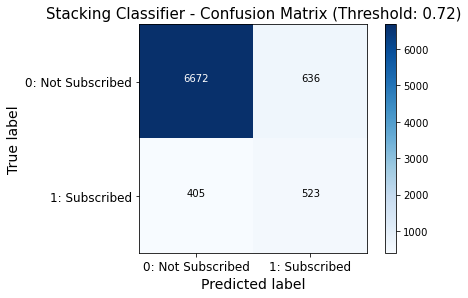

In [353]:
stack_cm_newtrs_2 = confusion_matrix(y_test, stack_preds_newtrs_2, labels=[0,1])
plot_confusion_matrix(stack_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Stacking Classifier - Confusion Matrix (Threshold: 0.72)')

In [354]:
print('Stacking Classifier: Classification Report (Threshold: 0.72)')
print(classification_report(y_test, stack_preds_newtrs_2, labels=[0,1], target_names=['Not Subscribed', 'Subscribed']))

Stacking Classifier: Classification Report (Threshold: 0.72)
                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.93      7308
    Subscribed       0.45      0.56      0.50       928

      accuracy                           0.87      8236
     macro avg       0.70      0.74      0.71      8236
  weighted avg       0.89      0.87      0.88      8236



In [327]:
stack_table_idx = ['SC - Best Classifier']
metrics_stack = [round(precision_score(y_test, stack_preds_newtrs_2),2),
                 round(recall_score(y_test, stack_preds_newtrs_2),2),
                 round(f1_score(y_test, stack_preds_newtrs_2),2),
                 round(accuracy_score(y_test, stack_preds_newtrs_2),2),
                 round(f1_score(y_test, stack_preds_newtrs_2, average = 'macro'),2)]

stack_report_table = pd.DataFrame(data=[metrics_stack], index=stack_table_idx, columns=headers)
report_table_final = pd.concat([report_table, stack_report_table])
print('Report Table')
report_table_final

Report Table


Precision - Positive Class  Recall - Positive Class  \
KNN - Best Classifier                          0.44                     0.57   
RF - Best Classifier                           0.44                     0.57   
Support Vector Machines                        0.38                     0.60   
SC - Best Classifier                           0.45                     0.56   

                         F1_Score - Positive Class  Accuracy  \
KNN - Best Classifier                         0.50      0.87   
RF - Best Classifier                          0.50      0.87   
Support Vector Machines                       0.47      0.85   
SC - Best Classifier                          0.50      0.87   

                         F1_Score - macro avg  
KNN - Best Classifier                    0.71  
RF - Best Classifier                     0.71  
Support Vector Machines                  0.69  
SC - Best Classifier                     0.71

## 4. Results  <a name=results></a>

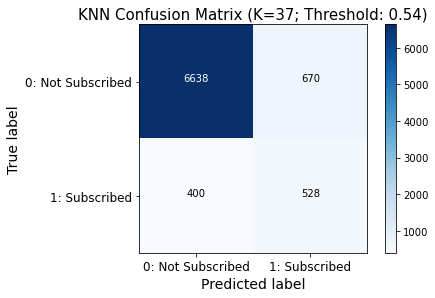

In [355]:
knn_cm_newtrs_2_enn = confusion_matrix(y_test, knn_preds_newtrs_2_enn, labels=[0,1])
plot_confusion_matrix(knn_cm_newtrs_2_enn, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='KNN Confusion Matrix (K=37; Threshold: 0.54)')

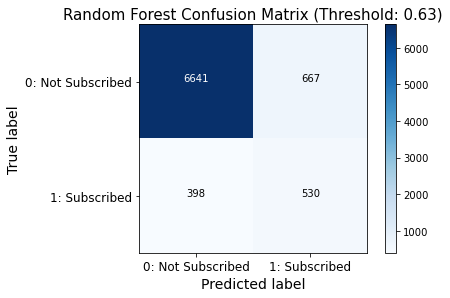

In [356]:
plot_confusion_matrix(rf_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Random Forest Confusion Matrix (Threshold: 0.63)')

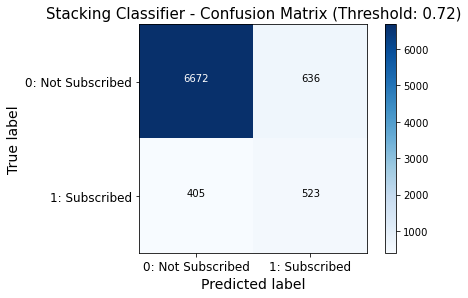

In [357]:
stack_cm_newtrs_2 = confusion_matrix(y_test, stack_preds_newtrs_2, labels=[0,1])
plot_confusion_matrix(stack_cm_newtrs_2, classes=['0: Not Subscribed', '1: Subscribed'],
                      title='Stacking Classifier - Confusion Matrix (Threshold: 0.72)')

K-Nearest Neighbors, Random Forest, and Stacking Classifier were the best classifiers, with performance metrics very close to each other. Stacking Classifier, amongst the 3 models, had the greatest precision, but the lowest recall. From a marketing perspective, a marketing performance predictive model should predict as many correct successful examples (observations belonging to the positive class) as possible; therefore, considering the business priorities, KNN and Random Forest fitted the business purposes better.  
KNN and Random Forest had almost identical out-of-sample performance metrics; although Random Forest slightly exceeds KNN performance by correctly predicting 2 more positive examples.  
**I select Random Forest as the classifier that best suits the project purpose**, optimized with the following hyperparameters:
* Number of estimators/trees: 10
* Criterion to measure the information gain: Gini
* Maximum depth of Decision Trees: 5
* Class Weight: balanced weights
* Probability Threshold: 0.63

## 5. Discussion <a name=discussion></a>

Following the mentioned methodology (class sampling, decision threshold moving, performance benchmarking…), I managed to increase model F1-score (macro-average) from 0.65 (first KNN trained model) to 0.71 (Random Forest), measured on an out-of-sample set.  
Random Forest was the classifier that best suited the project purpose (K-Nearest Neighbors, with Edited Nearest Neighbors undersampling technique, produced comparable results).  
Regarding the relevance of features, I look into each feature importance with regard to target variable prediction.

In [222]:
# Feature importances
zip(x_train.columns, rf_grid.best_estimator_.feature_importances_)
rf_grid.best_estimator_.feature_importances_

array([1.28622345e-02, 4.75110401e-03, 3.64599409e-03, 4.95712697e-02,
       3.54667077e-02, 8.37910415e-02, 3.31327731e-01, 3.48283438e-01,
       2.49220305e-02, 6.42889710e-02, 2.13449440e-03, 8.91155561e-05,
       1.70848789e-04, 5.68797455e-04, 6.83824592e-03, 2.19661339e-02,
       1.18114797e-03, 8.13866701e-03, 2.02655158e-06])

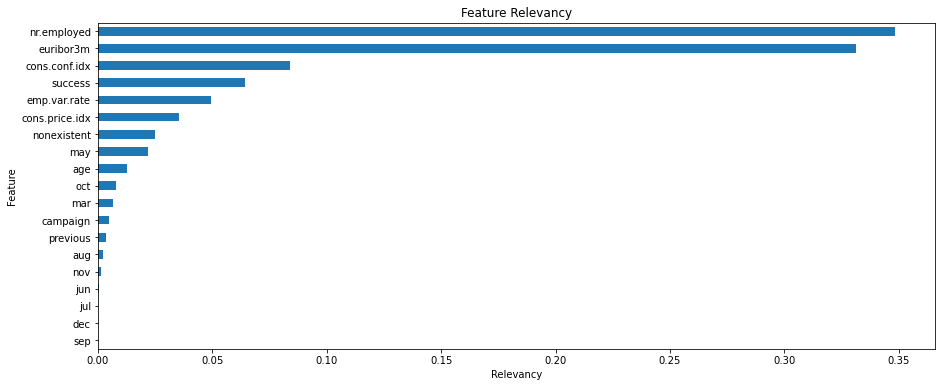

In [358]:
# Feature importances
import operator

feat_rel = dict(zip(x_train.columns, rf_best.feature_importances_))
feat_rel = dict(sorted(feat_rel.items(), key=operator.itemgetter(1), reverse=False))
feat_rel = pd.DataFrame.from_dict(feat_rel, orient='index')
feat_rel = feat_rel.rename(columns={'0':'relevancy'})
feat_rel.plot(kind='barh', legend=None, figsize=(15,6))
plt.title('Feature Relevancy')
plt.ylabel('Feature')
plt.xlabel('Relevancy')
plt.show()

The 5 most relevant features include 4 socio-economic variables, nr.employed (number of employees), euribor3m (euribor 3 month rate), cons.conf.idx (consumer confidence index), and emp.var.rate (employement variation rate), and 1 marketing-related variable (whether if the previous marketing campaign was successful or not).  
nr.employed and euribor3m are the features with, by far, the greatest importance for predicting the success of the marketing campaign under consideration.  
All other features have a relevancy score less than 0.05.

In [221]:
# Extract single tree
estimator = rf_best.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_train.columns,
                class_names = ['0: Not Subscribed', '1: Subscribed'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## 6. Conclusion <a name=conclusion></a>

In this project I built a Classification model to predict whether an instance of a marketing campaign is successful or not. The main focus was on prediction, therefore my main purpose was to build a predictive model able to correctly predict as many positive example as possible, without losing too much accuracy.  
A major problem was that the classes were quite imbalanced, so I had to consider following performance metrics (besides the Accuracy score):
* Precision, Recall, and F1-score for Positive Class
* Model F1-score (macro average)  
I dealt with the imbalanced classes in 2 ways:
* Whereas available, I used the “class_weight” hyperparameter.
* If “class_weight” wasn’t available as model parameter, I applied below sampling approaches:
  * Undersampling the majority class with Edited Nearest Neighbors
  * Oversampling the minority class with SMOTE (Synthetic Minority Oversampling Technique) algorithm
  * Resampling the whole dataset combining Edited Nearest Neighbors and SMOTE.  

To further improve classifier performance, I plotted ROC and Precision/Recall curves, check for the best decision threshold, and compared different model performances (which were indeed quite similar).  
Quality of data was good: I found very few duplicates and wrongly recorded data, no missing values, and no outliers.  
The selected model (Random Forest with probability threshold at 0.63) is able to correctly predict more than half of observations belonging to the positive class, with an overall accuracy of 87%. Therefore, the model’s performance can still improve, specially with regard to minority class predictions. **For this purpose, additional data is needed to train the model on a larger dataset, and capture the still-not-seen underlying relationships between variables.**